#  Chapter 9: Unsupervised Learning Techniques

1. **How would you define clustering? Can you name a few clustering algorithms?**
   Clustering is the process of grouping similar entities together. It is an unsupervised learning technique used to categorize unlabeled data. Some common clustering algorithms include:
   - K-Means
   - DBSCAN
   - Hierarchical Clustering
   - Mean Shift

2. **What are some of the main applications of clustering algorithms?**
   
   Clustering has a wide array of applications such as:
   - Market segmentation
   - Social network analysis
   - Image segmentation
   - Anomaly detection

3. **Describe two techniques to select the right number of clusters when using K-Means.**
   
   - *Elbow Method*: Involves plotting the explained variance against the number of clusters and finding the point where the increase in the number of clusters does not provide a significant improvement in variance explained.
   - *Silhouette Score*: Measures how similar an object is to its own cluster compared to other clusters. The silhouette score reaches its maximum value when the number of clusters is optimal.

4. **What is label propagation? Why would you implement it, and how?**
   
   Label propagation is a semi-supervised learning technique where the algorithm assigns labels to previously unlabeled data points based on labeled examples and the similarity among instances. It is used to leverage a small amount of labeled data to label a larger dataset. It can be implemented using a similarity graph over the data and iterating until the labels are consistent over the graph.

5. **Can you name two clustering algorithms that can scale to large datasets? And two that look for regions of high density?**
   
   For large datasets:
   - Mini-Batch K-Means
   - BIRCH
   For regions of high density:
   - DBSCAN
   - OPTICS

6. **Can you think of a use case where active learning would be useful? How would you implement it?**
   
   A use case for active learning could be in medical image classification, where a model is initially trained on a small set of labeled images and then iteratively requests labels for the most uncertain predictions from a medical expert. This process continues until performance meets a required threshold.

7. **What is the difference between anomaly detection and novelty detection?**
   
   Anomaly detection identifies outliers in the data that may represent errors or unusual conditions. Novelty detection identifies new patterns in the data that were not present during the training phase and may represent new or rare events.

8. **What is a Gaussian mixture? What tasks can you use it for?**
   
   A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of several Gaussian distributions with unknown parameters. They are widely used for clustering, density estimation, and as a generative model for datasets.

9. **Can you name two techniques to find the right number of clusters when using a Gaussian mixture model?**
   
   - *Bayesian Information Criterion (BIC)*: Chooses the number of clusters that maximizes the BIC score.
   - *Akaike Information Criterion (AIC)*: Similar to BIC, but uses a different penalty for the number of parameters, choosing the number of clusters that maximizes the AIC score.


In [2]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import KMeans
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = fetch_olivetti_faces()
X, y = data.data, data.target

# Split the dataset
split = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
train_idx, test_idx = next(split.split(X, y))
X_train, X_test, y_train, y_test = X[train_idx], X[test_idx], y[train_idx], y[test_idx]


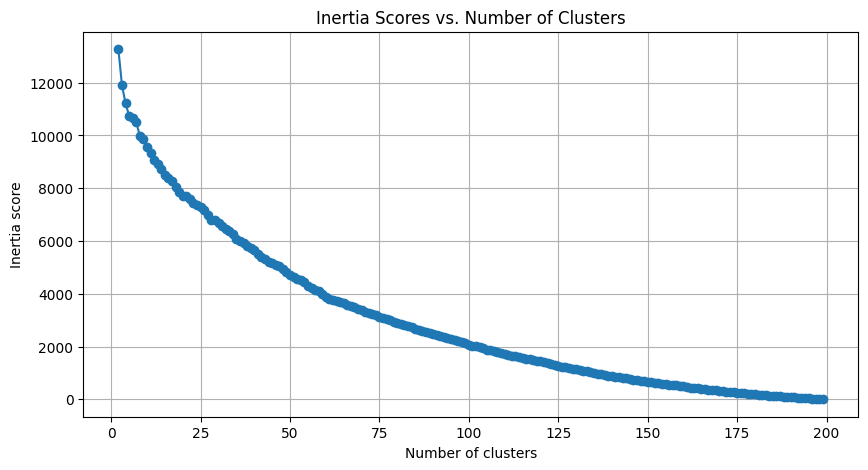

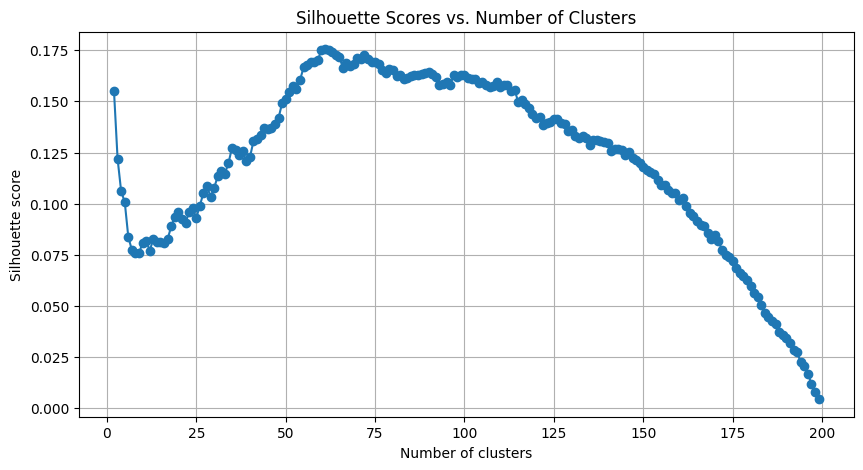

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assume X_train is already defined as the flattened image data

# Determine the range of cluster sizes to evaluate
cluster_range = range(2, 200)  # for example, from 2 to 14 clusters

# Initialize lists to store the scores for each number of clusters
inertia_scores = []
silhouette_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    
    # Inertia score
    inertia_scores.append(kmeans.inertia_)
    
    # Silhouette score
    silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

# Plotting the inertia scores
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, inertia_scores, marker='o')
plt.title('Inertia Scores vs. Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia score')
plt.grid(True)
plt.show()

# Plotting the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores vs. Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.grid(True)
plt.show()


For n_clusters = 44, the average silhouette_score is : 0.13712234795093536
For n_clusters = 49, the average silhouette_score is : 0.14903543889522552
For n_clusters = 64, the average silhouette_score is : 0.17262759804725647
For n_clusters = 59, the average silhouette_score is : 0.1703321784734726
For n_clusters = 64, the average silhouette_score is : 0.17262759804725647
For n_clusters = 69, the average silhouette_score is : 0.1683586835861206
For n_clusters = 74, the average silhouette_score is : 0.16938786208629608


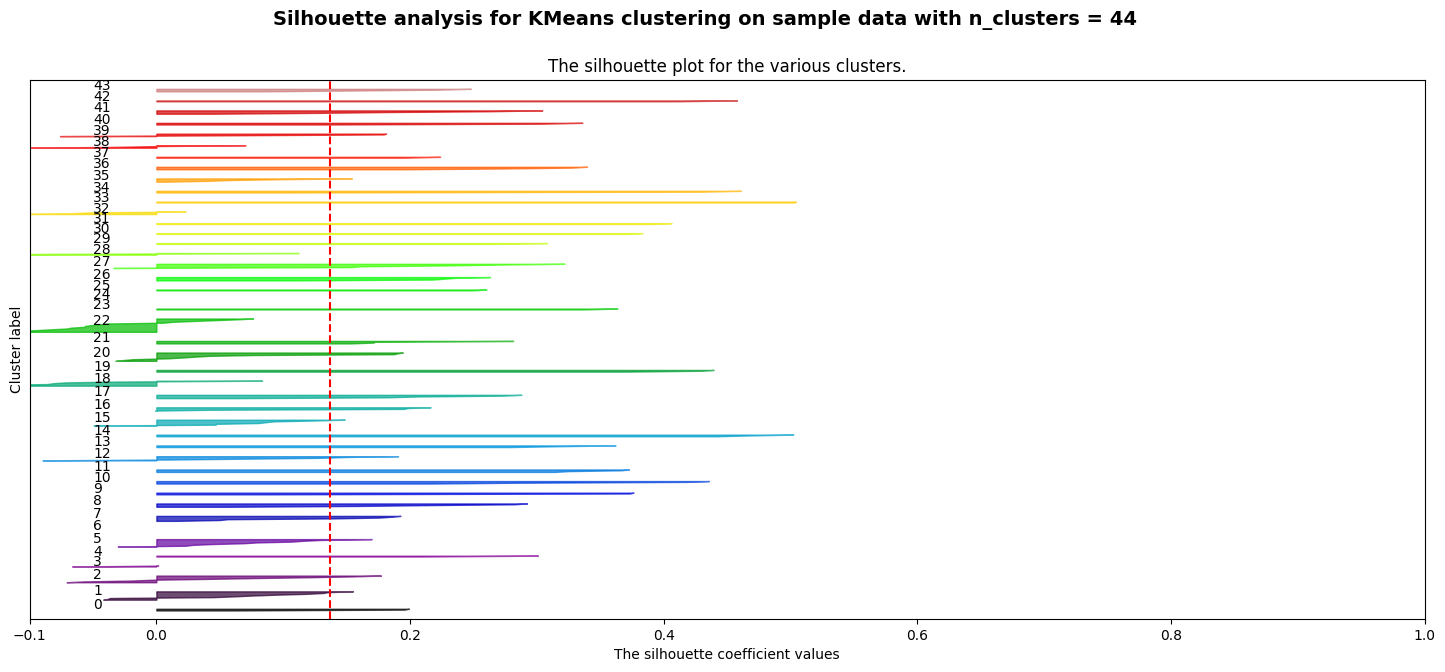

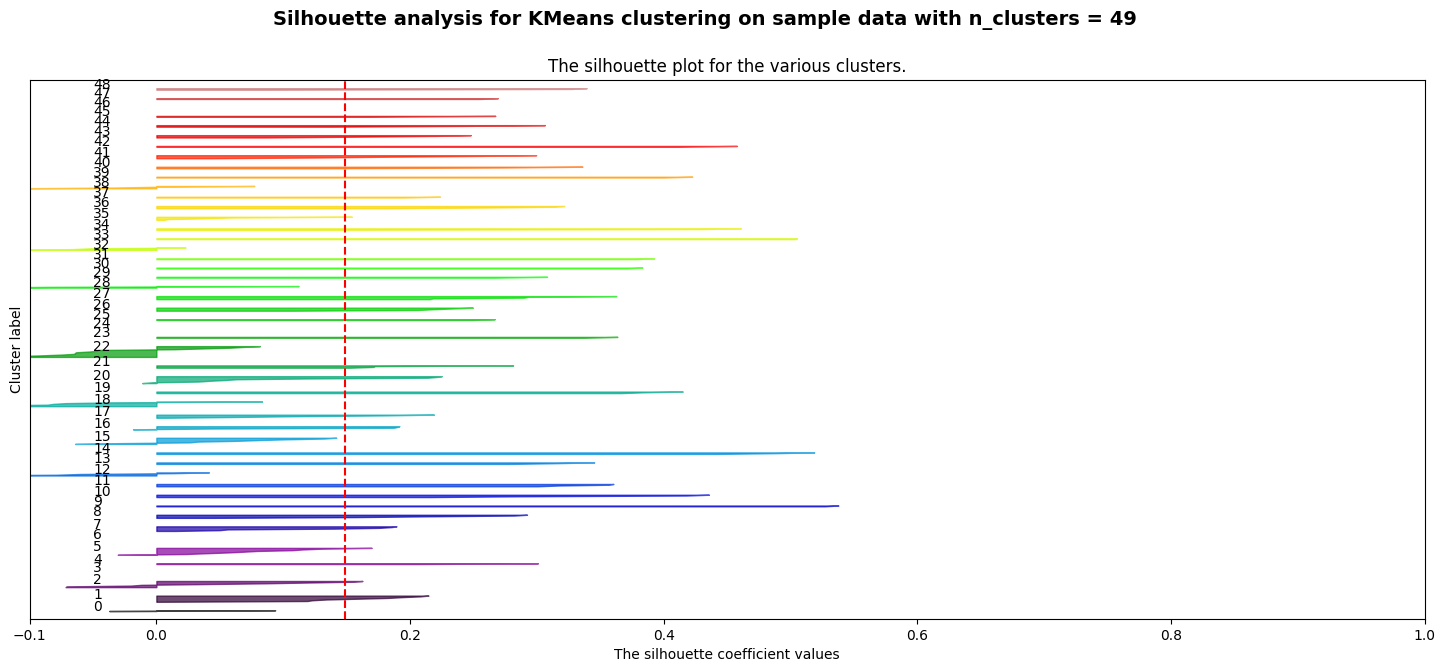

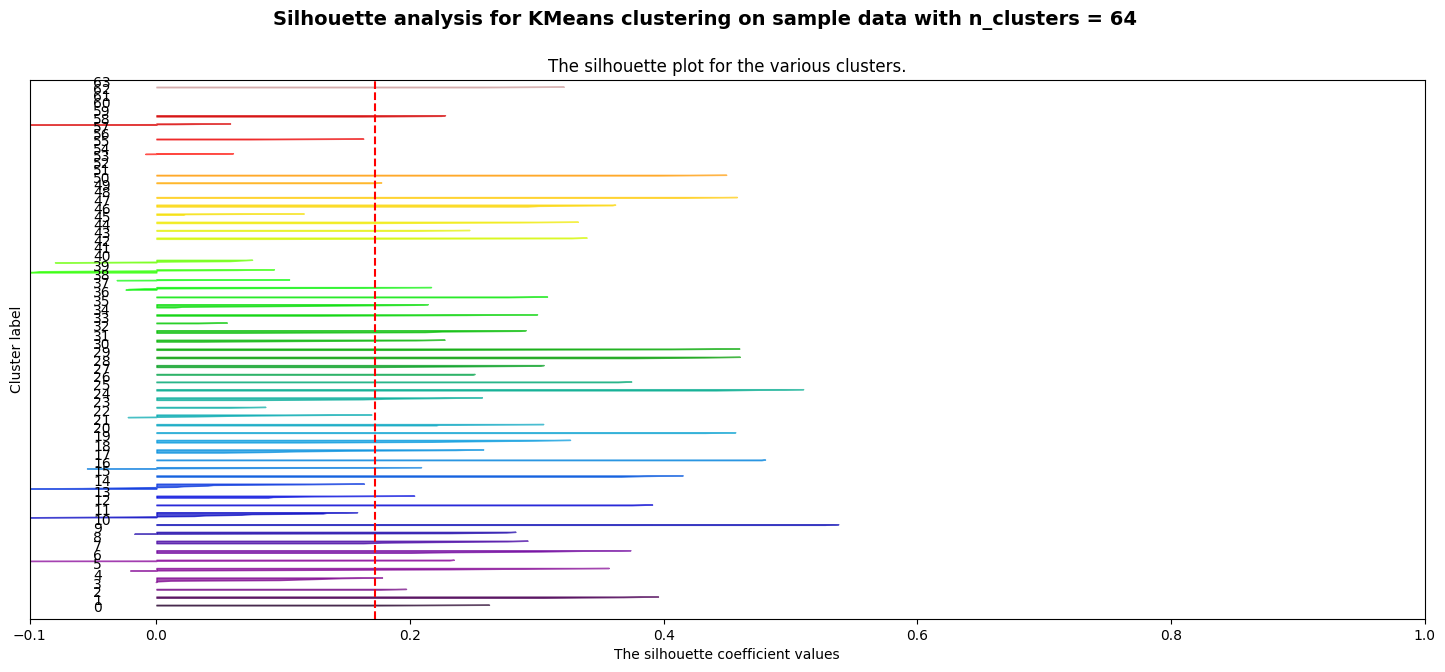

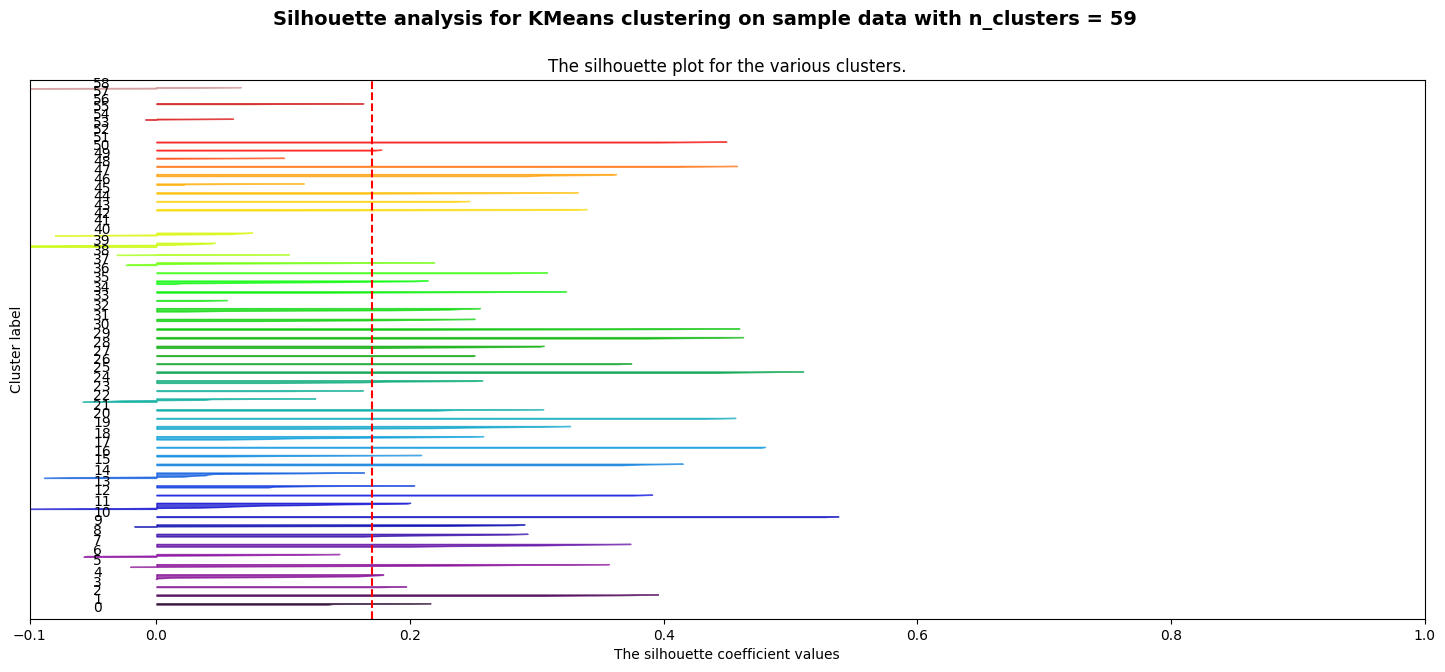

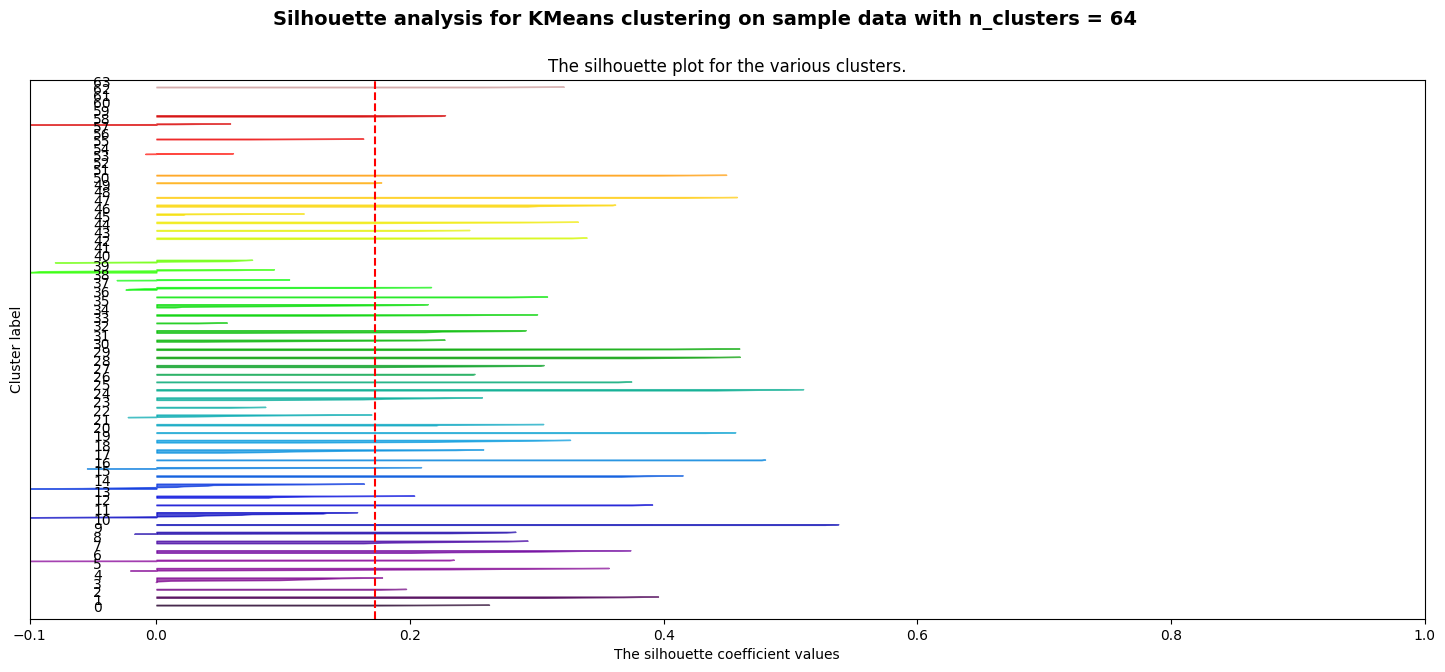

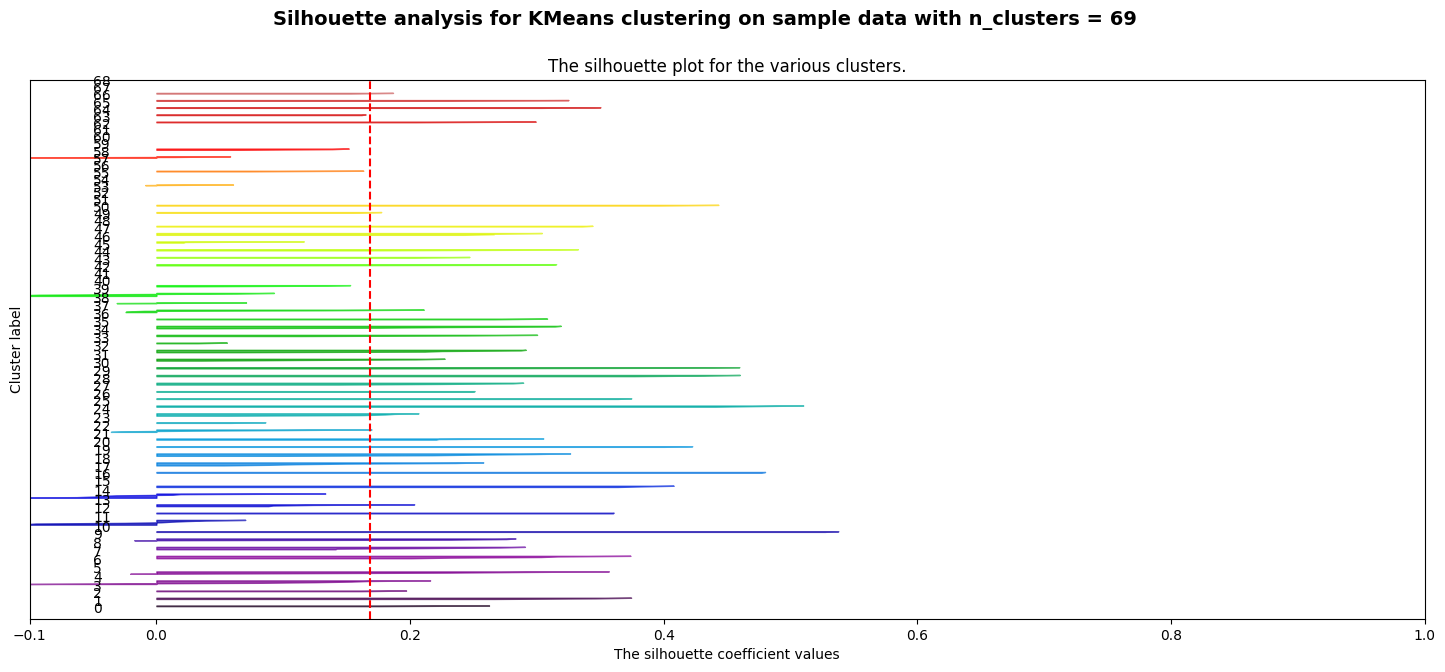

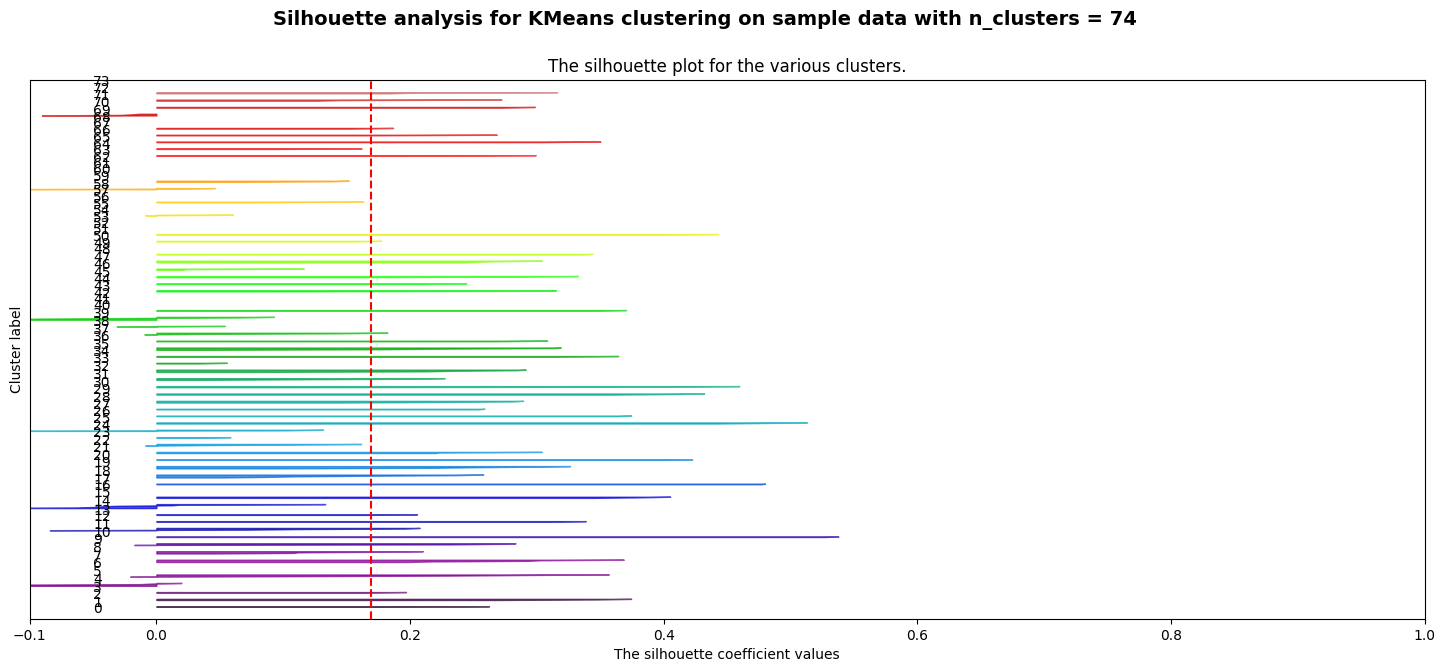

In [4]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

def plot_silhouette_diagram(X, range_n_clusters, random_state=42):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)

        # The silhouette plot
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      f"with n_clusters = {n_clusters}"),
                     fontsize=14, fontweight='bold')

    plt.show()

# Range of clusters you have evaluated
optimal_k = np.argmax(silhouette_scores)
optimal_k = [optimal_k - 15, optimal_k - 10, optimal_k+5, optimal_k, optimal_k+5, optimal_k+10, optimal_k+15]
plot_silhouette_diagram(X_train, optimal_k)

In [5]:
optimal_k = np.argmax(silhouette_scores)

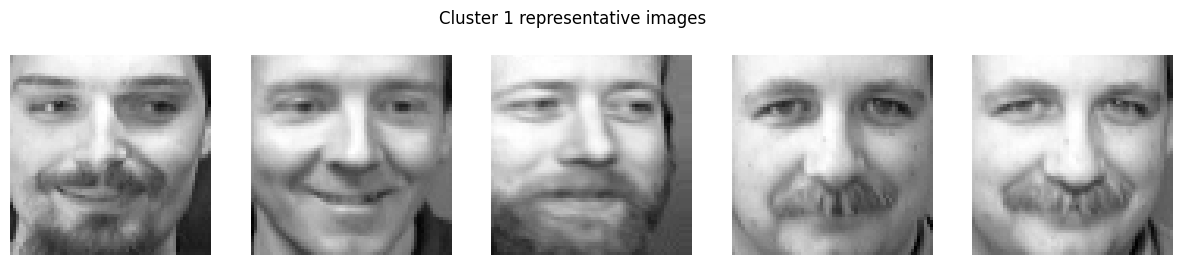

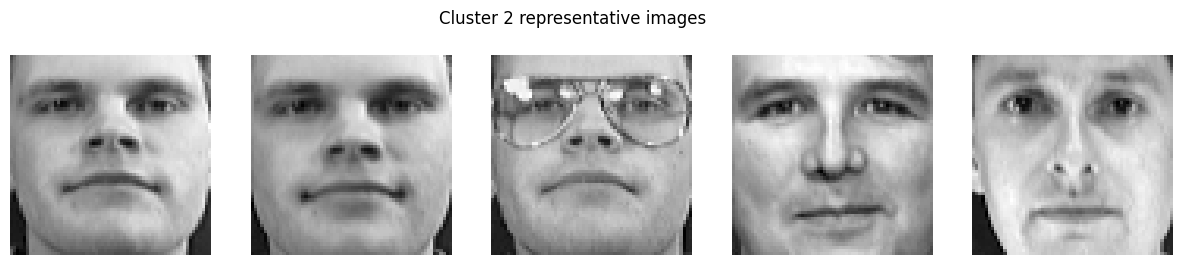

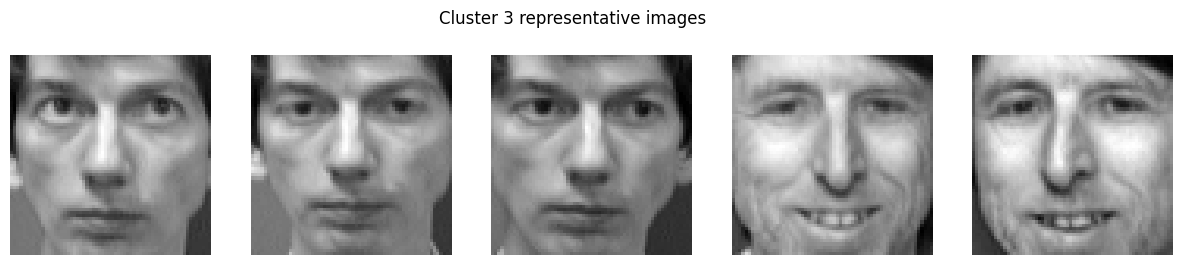

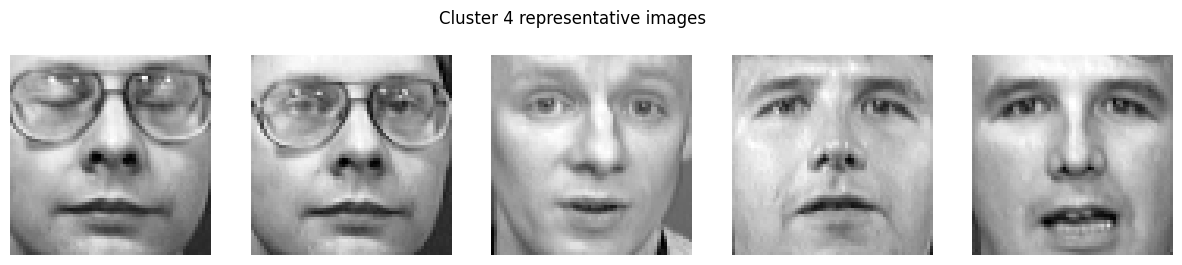

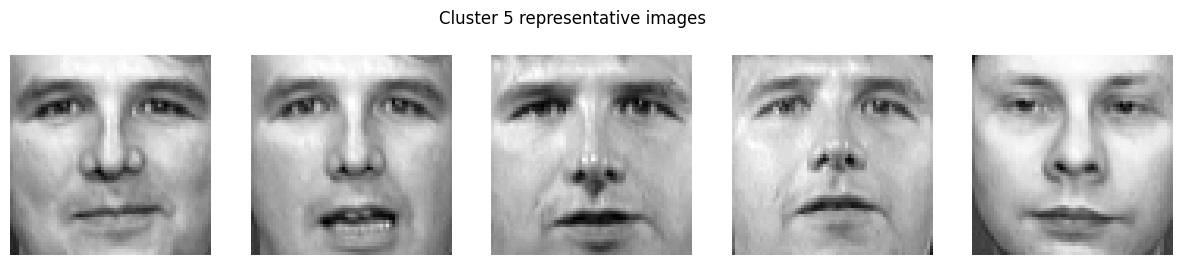

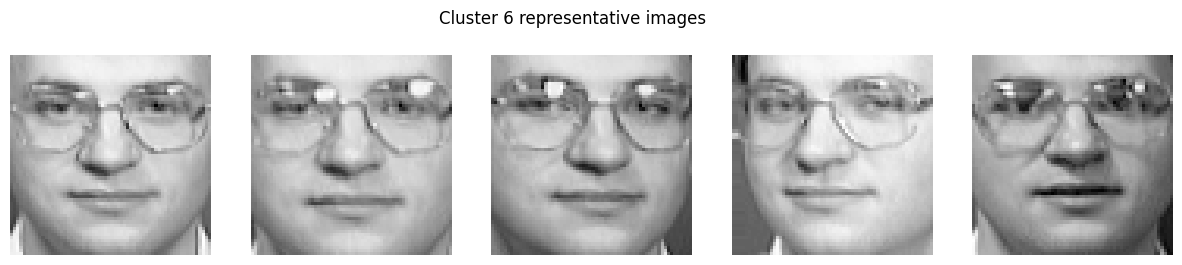

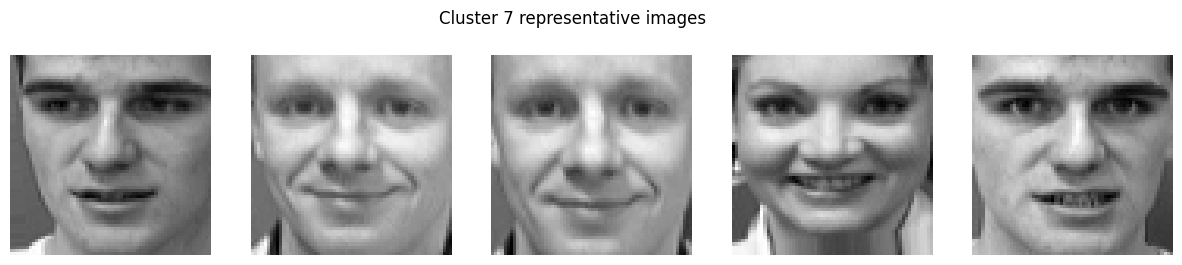

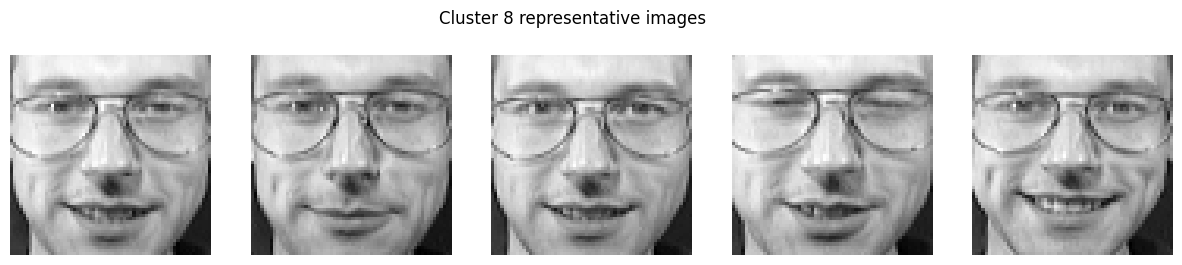

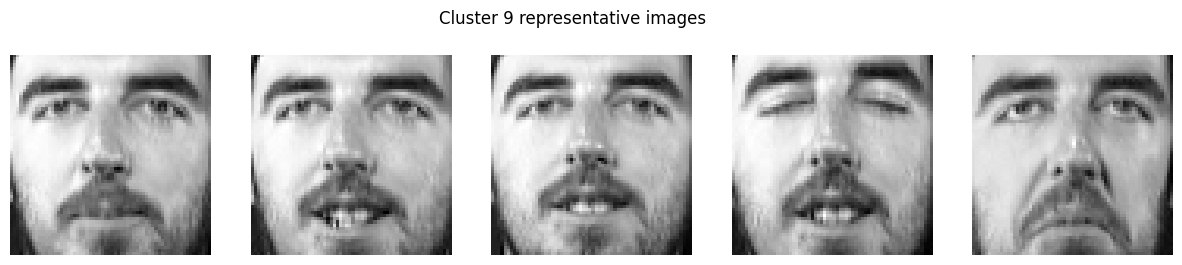

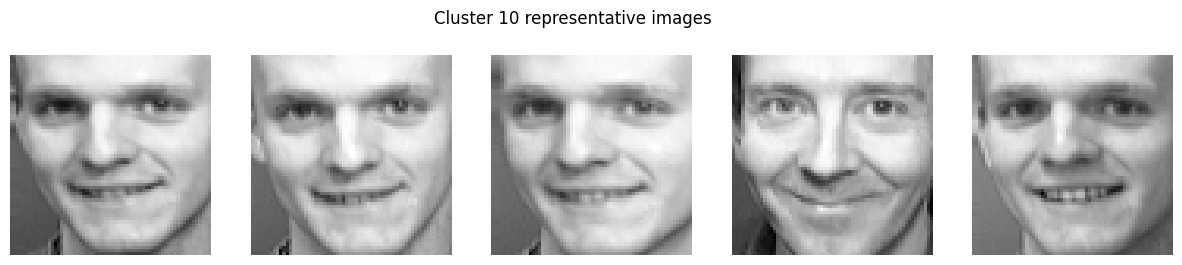

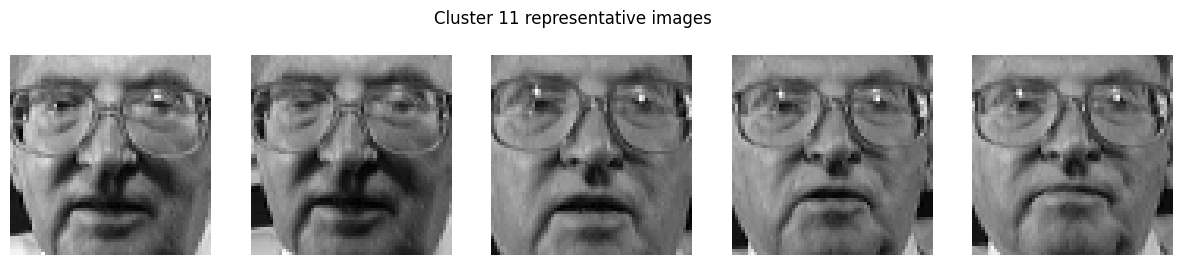

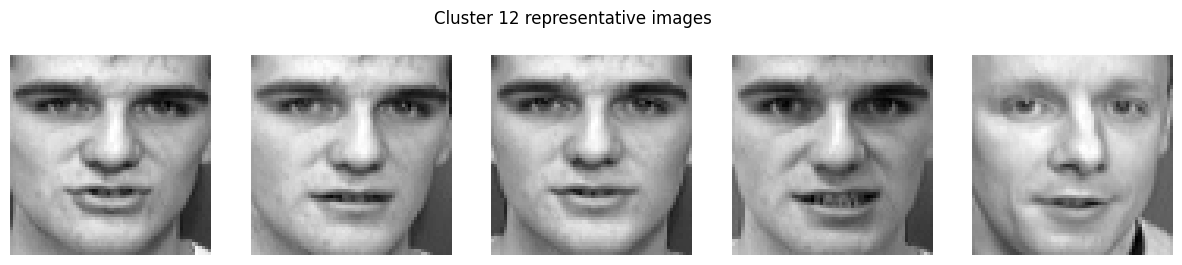

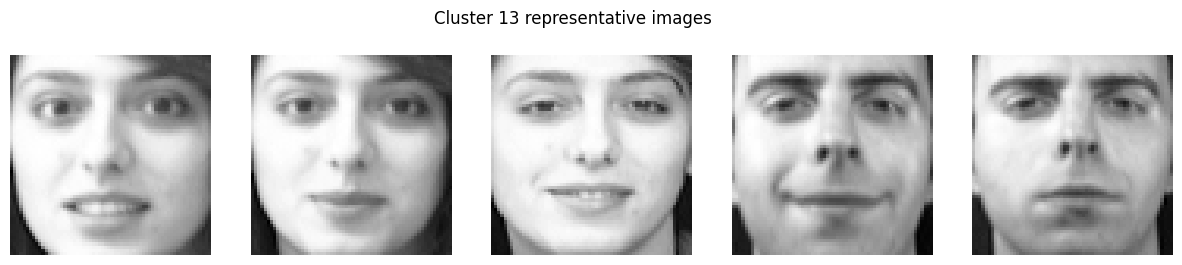

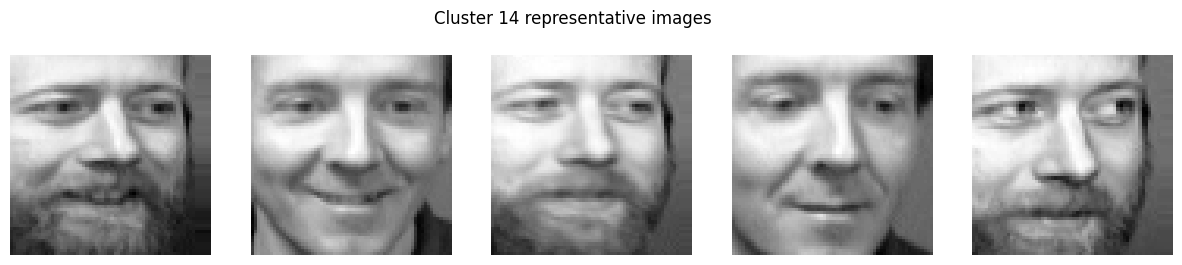

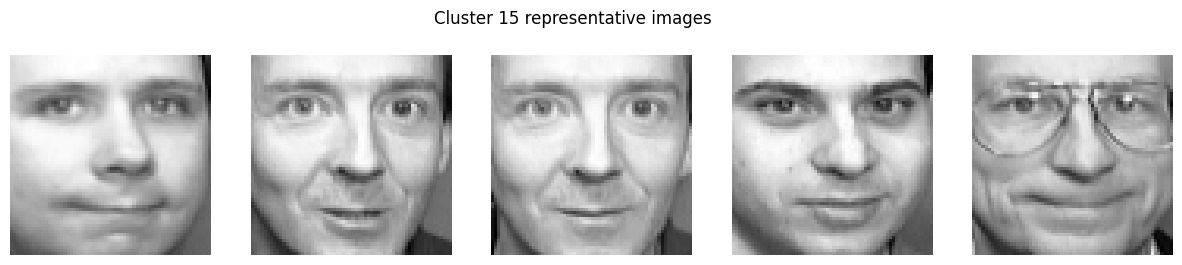

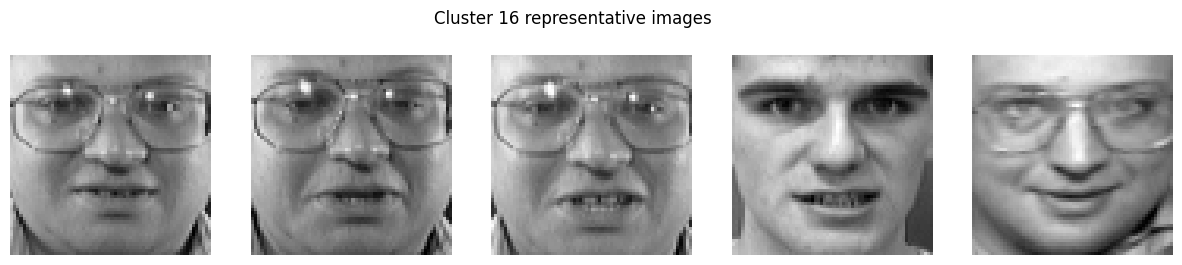

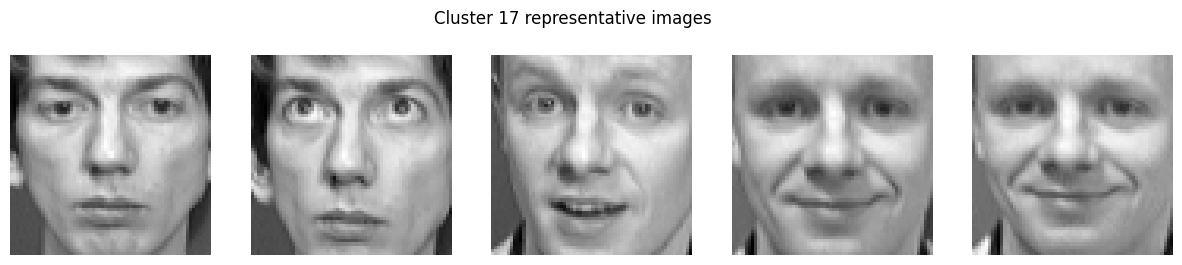

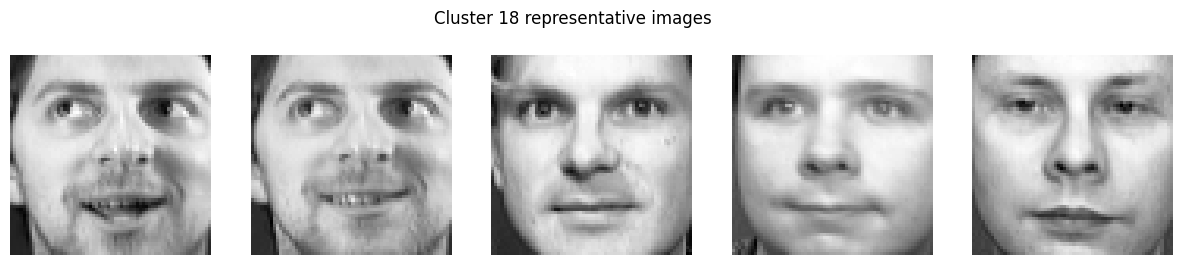

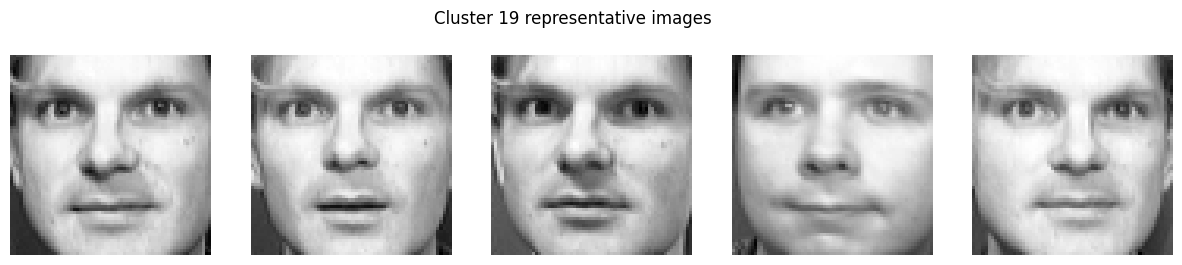

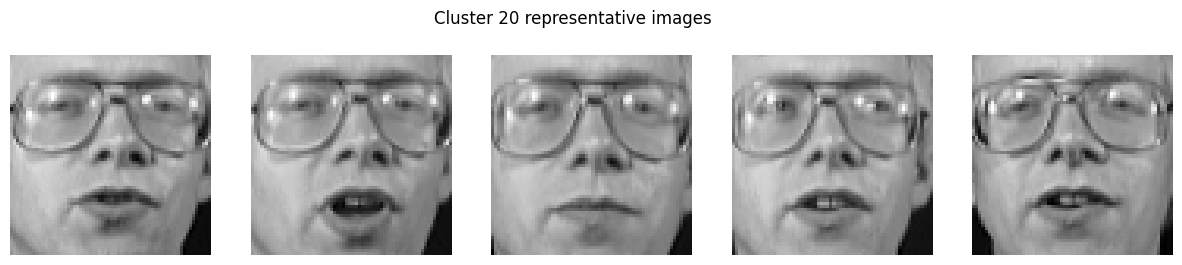

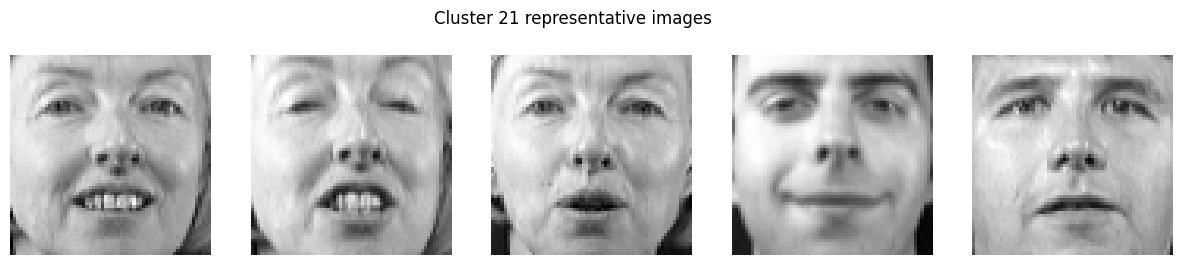

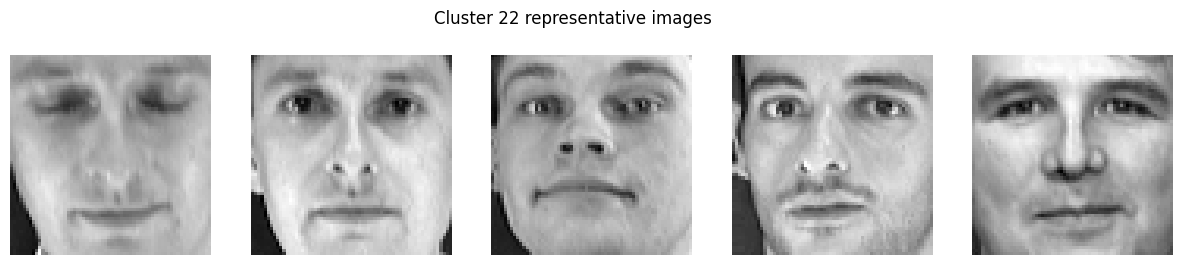

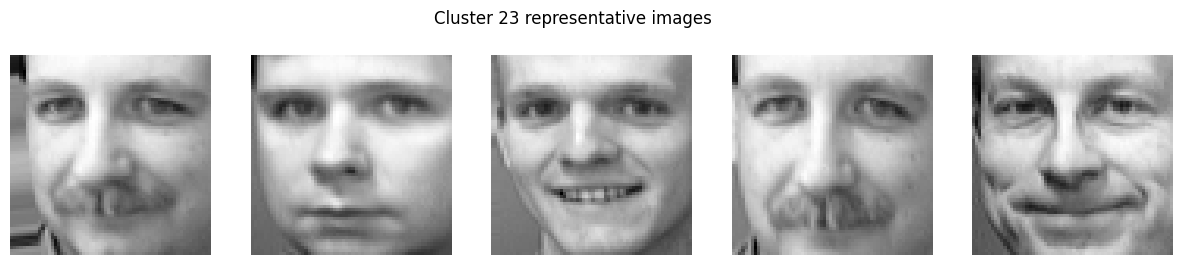

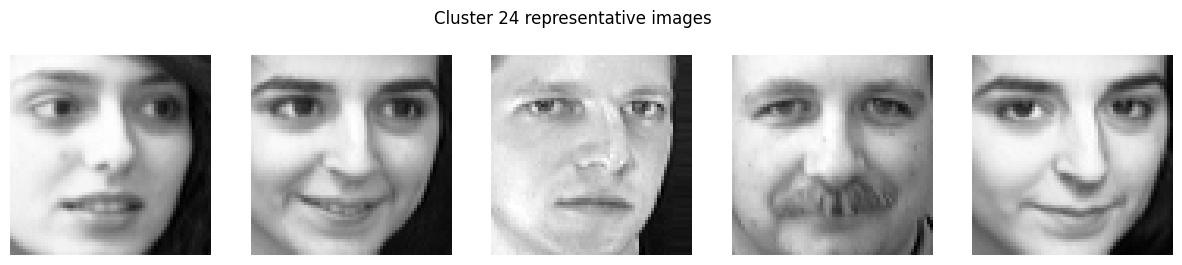

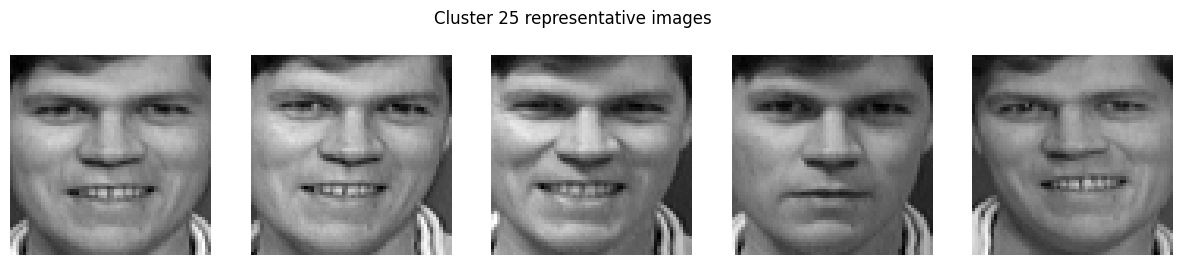

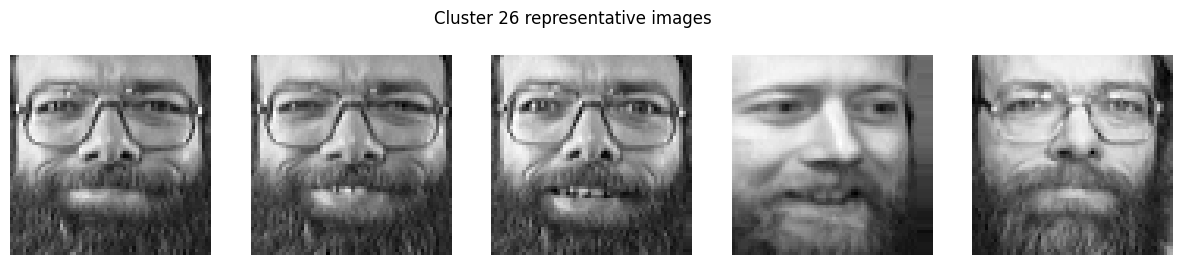

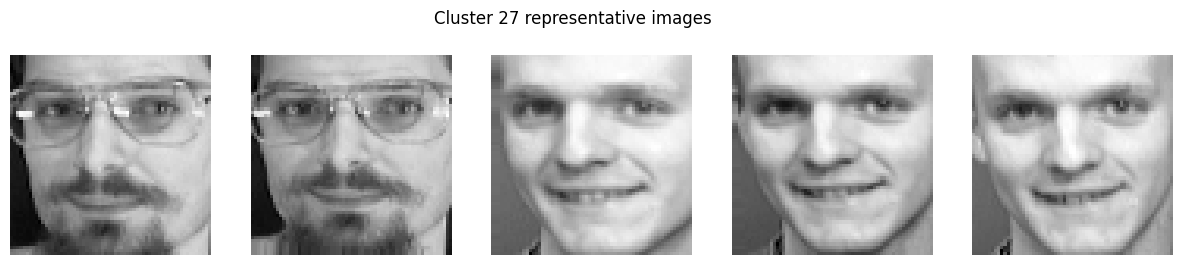

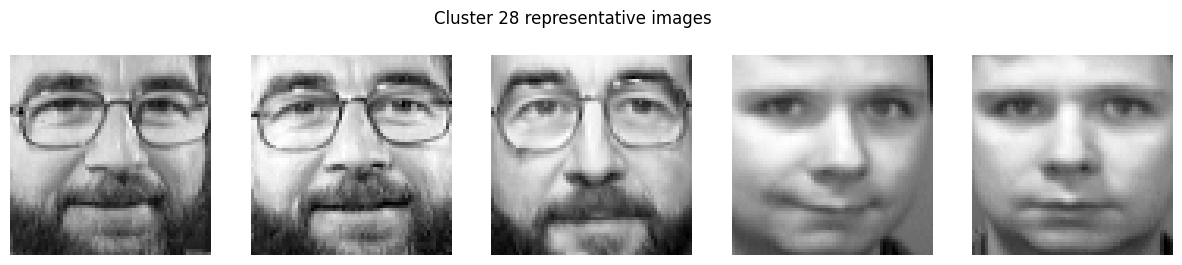

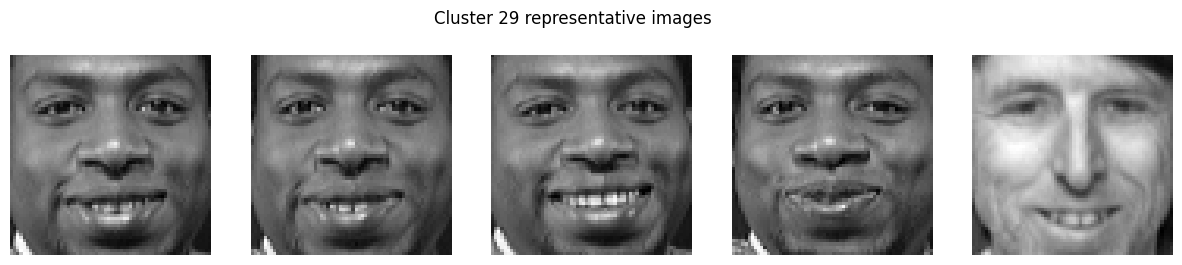

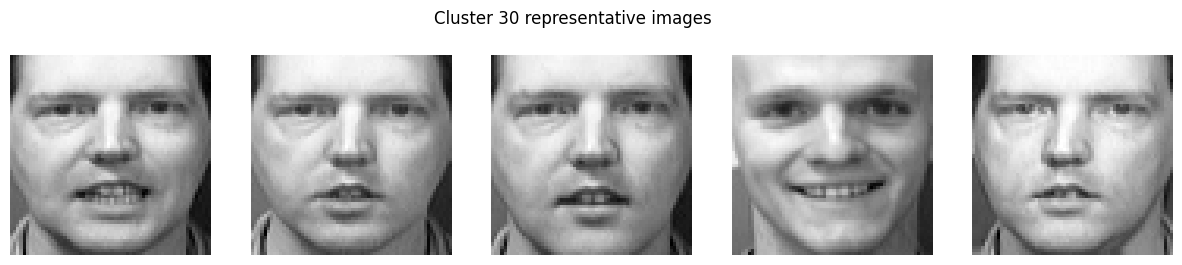

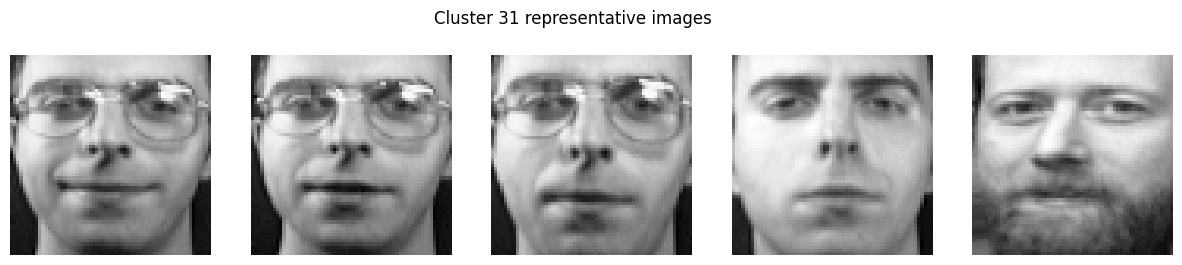

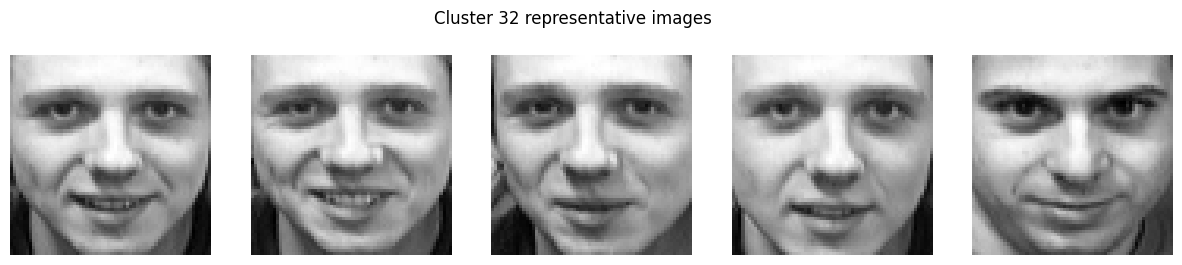

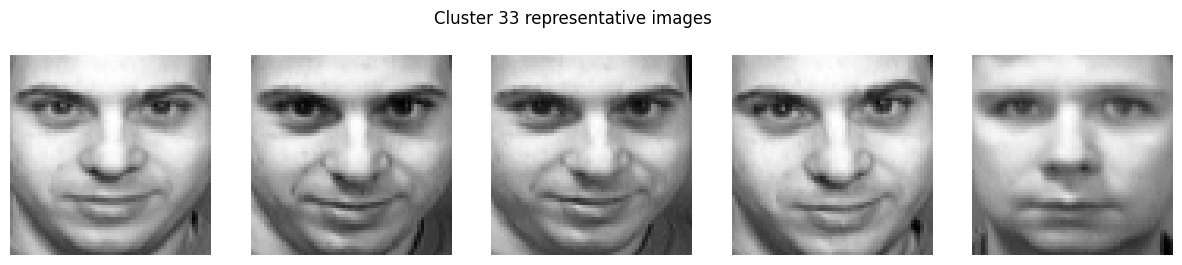

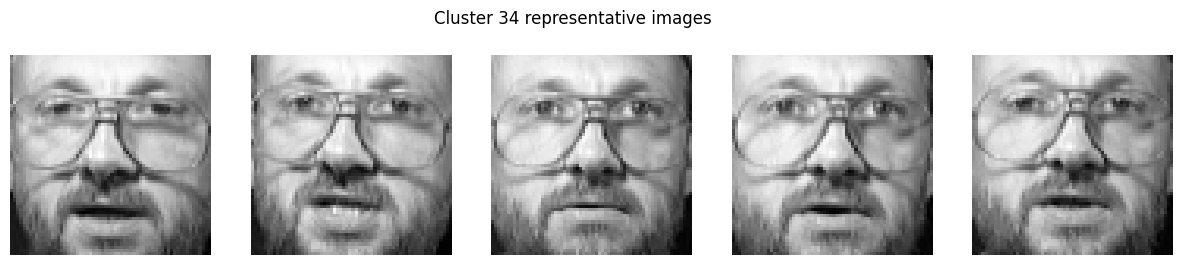

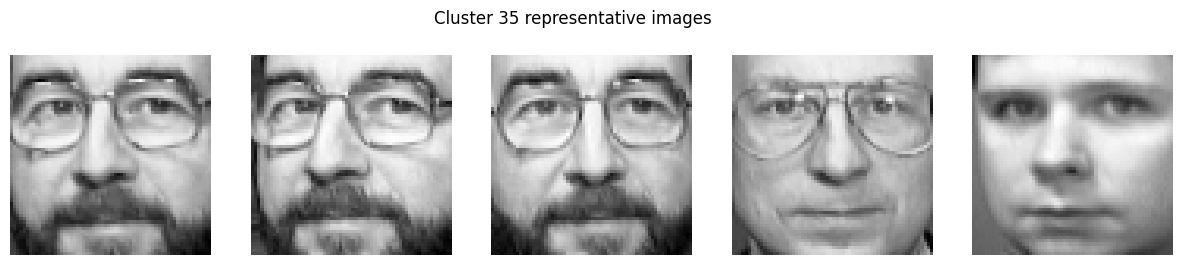

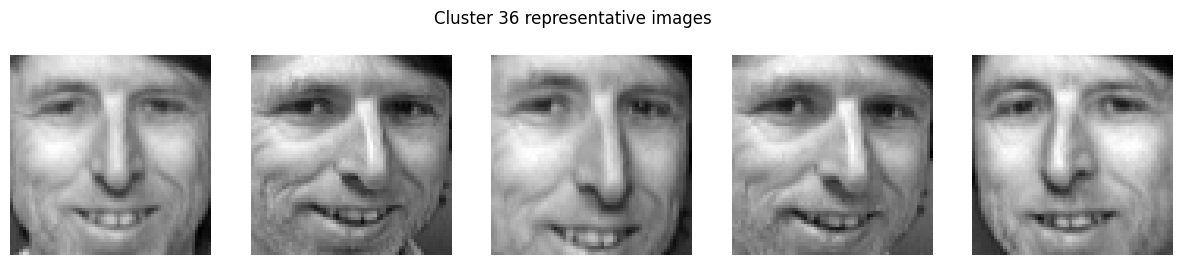

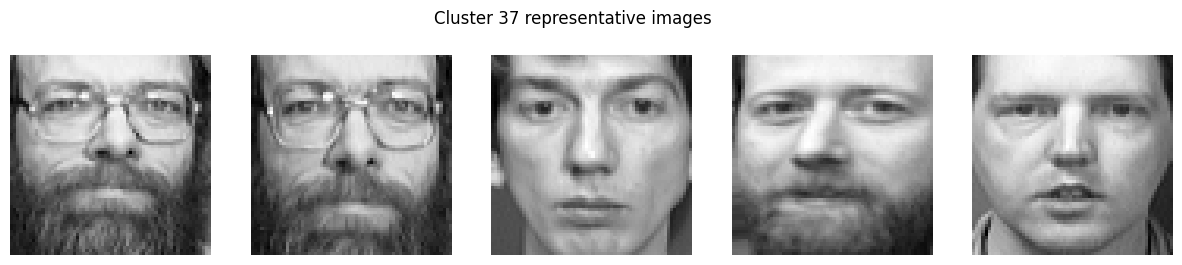

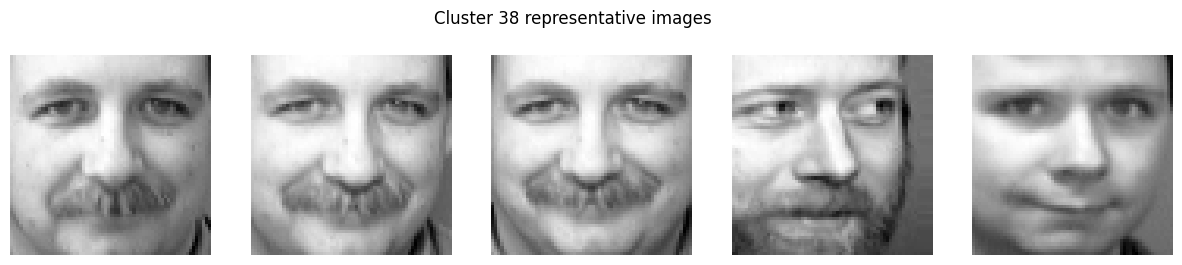

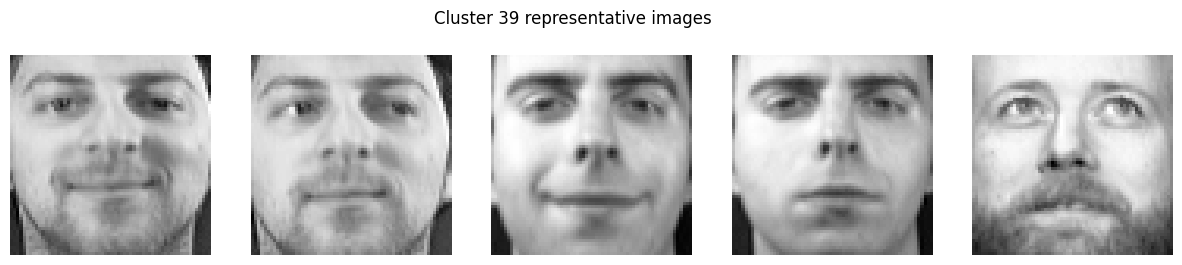

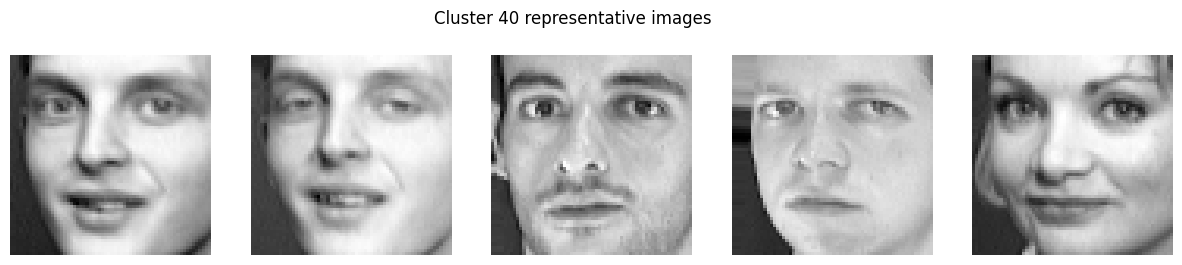

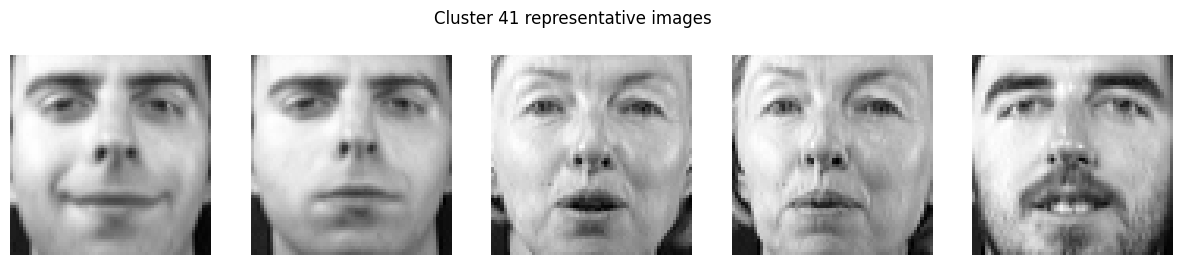

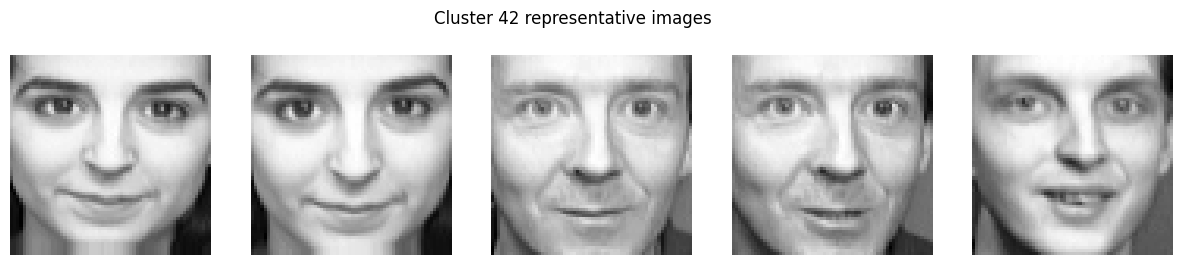

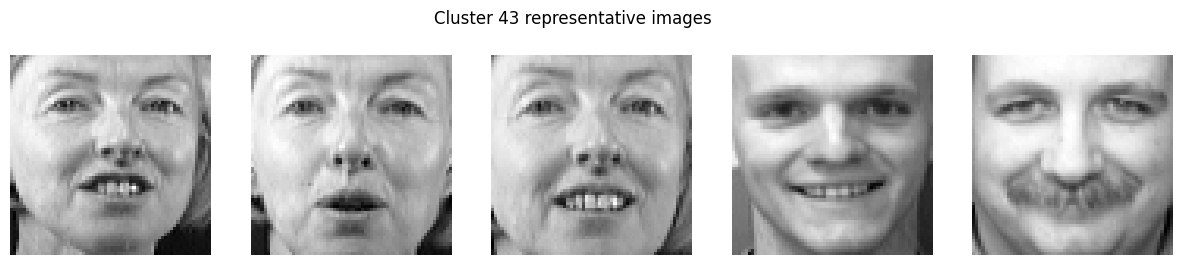

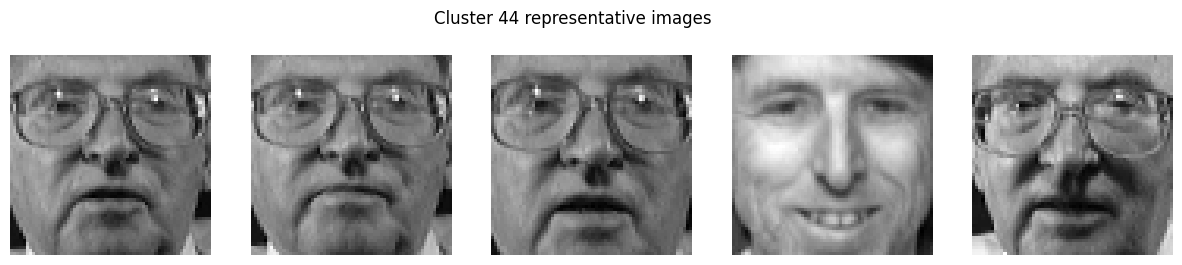

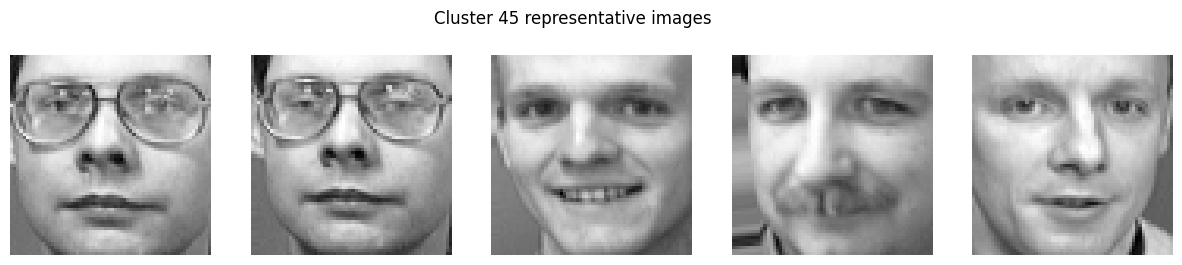

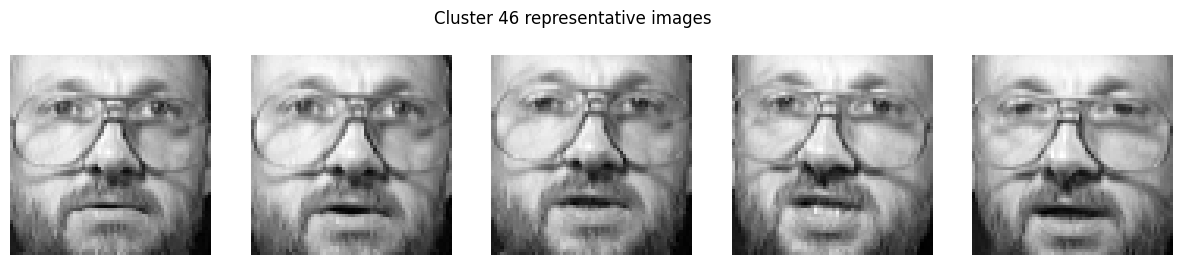

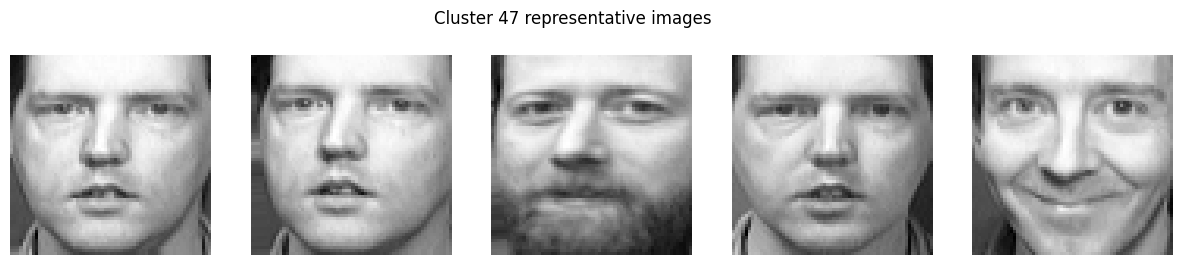

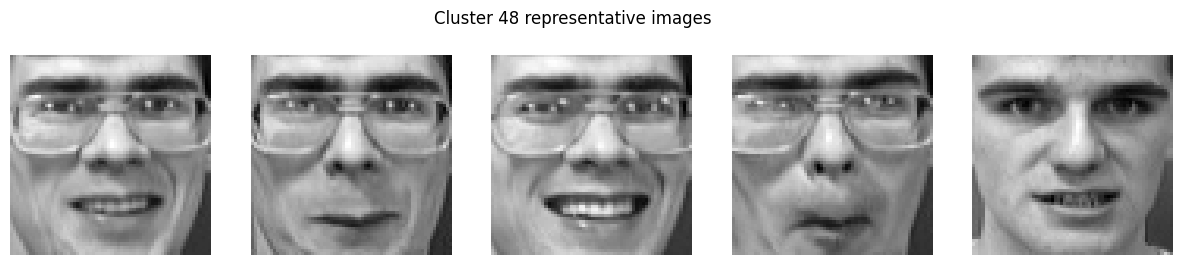

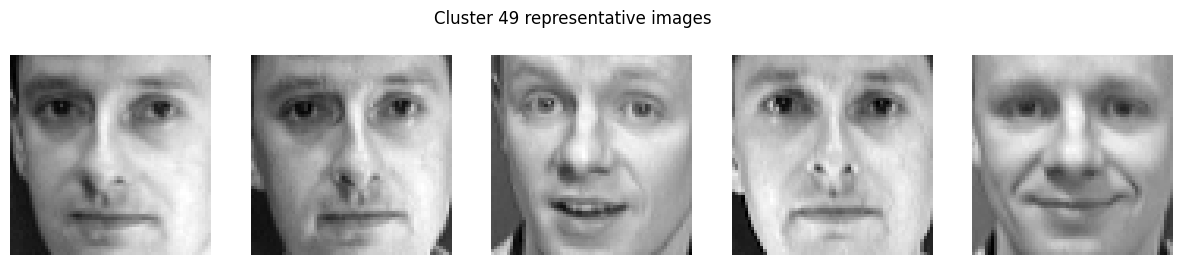

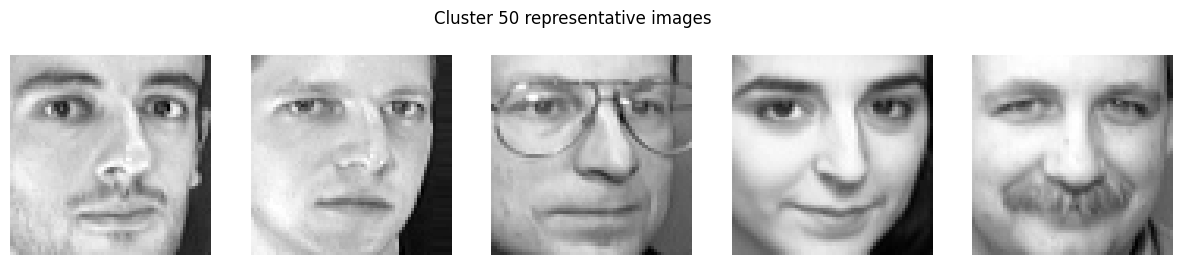

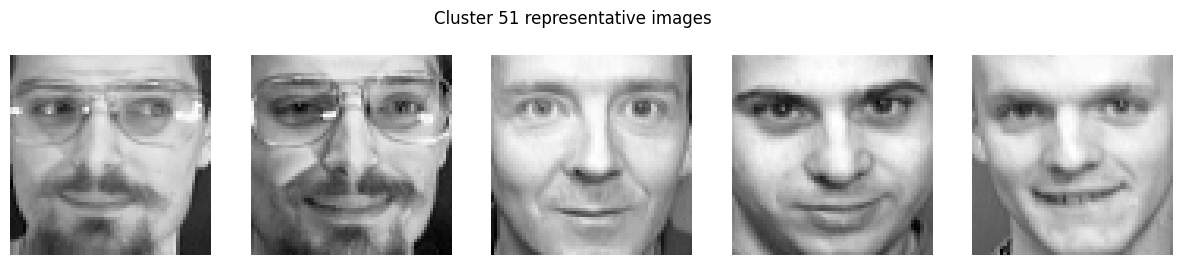

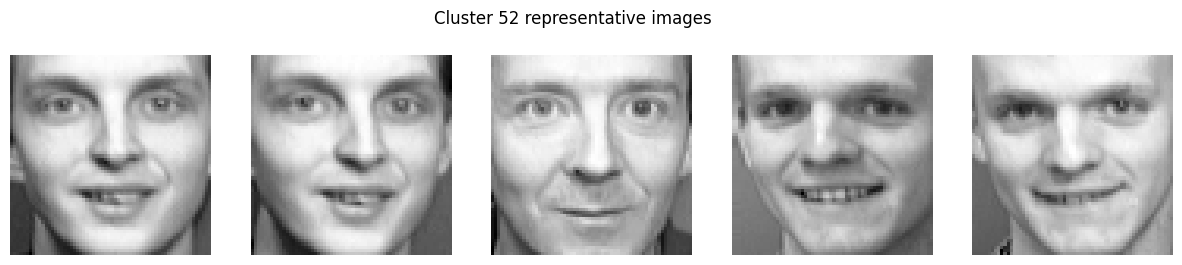

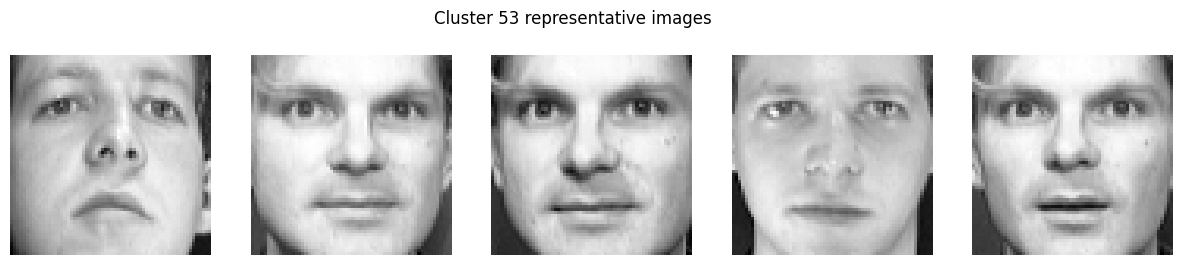

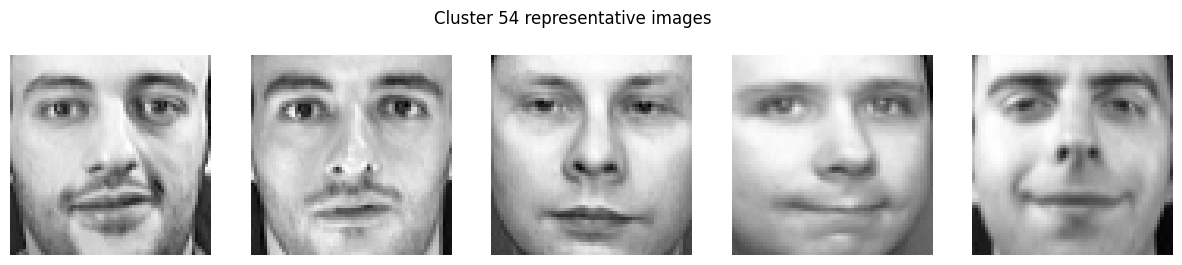

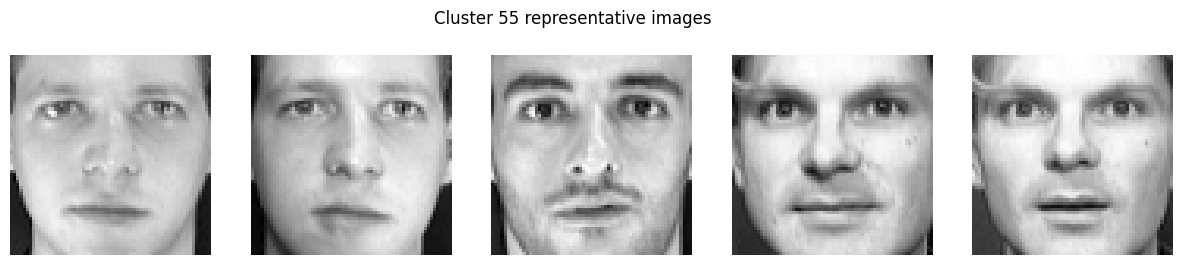

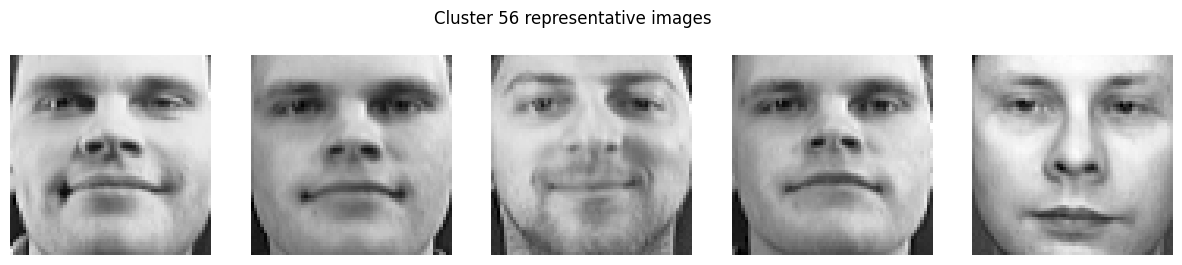

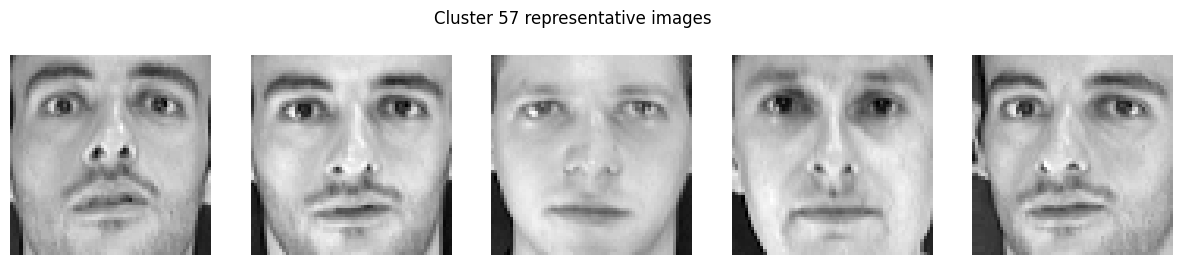

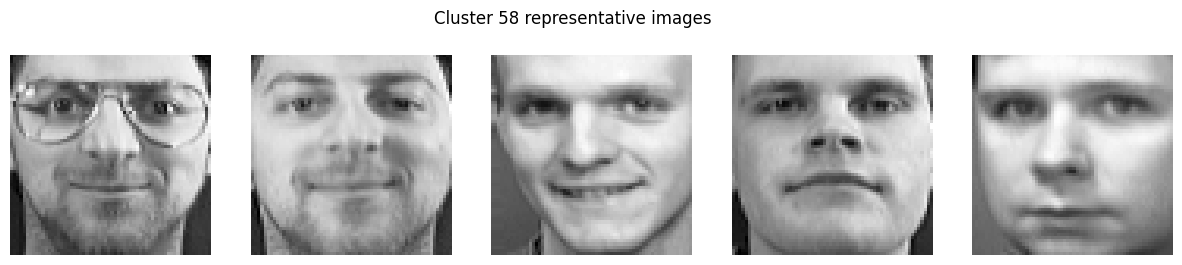

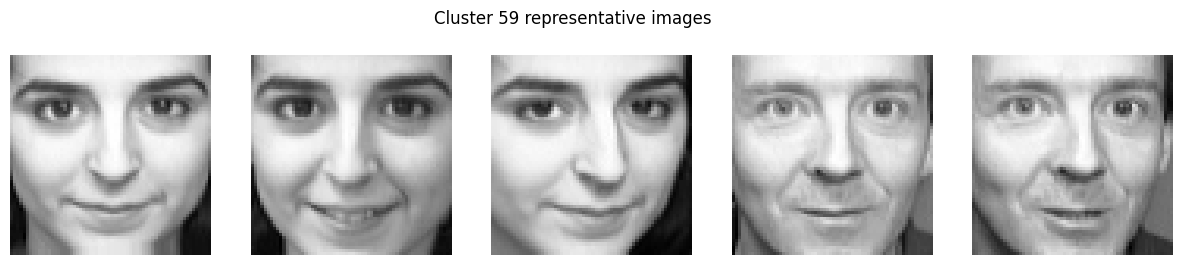

In [7]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train)

# To represent each cluster with images
for i in range(optimal_k):
    # Find indices of images closest to the cluster center
    distances_to_center = kmeans.transform(X_train)[:, i]
    closest_image_idxs = np.argsort(distances_to_center)[:5]  # 5 closest images
    
    # Plot images
    plt.figure(figsize=(15, 3))
    for idx, img_idx in enumerate(closest_image_idxs):
        plt.subplot(1, 5, idx + 1)
        plt.imshow(X_train[img_idx].reshape(64, 64), cmap='gray')  # Reshape as needed
        plt.axis('off')
    plt.suptitle(f'Cluster {i+1} representative images')
    plt.show()


In [8]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import KMeans
from scipy.stats import uniform, randint

# Assuming the dataset and the optimal number of clusters (optimal_k) are already defined

# Define the parameter space to explore
param_dist = {
    'init': ['k-means++', 'random'],  # The initialization method
    'n_init': randint(5, 20),         # Number of time the k-means algorithm will be run with different centroid seeds
    'max_iter': randint(300, 1000),   # Maximum number of iterations of the k-means algorithm for a single run
    'tol': uniform(1e-4, 1e-2)        # Relative tolerance with regards to inertia to declare convergence
}

# Initialize the KMeans model with the number of clusters found to be optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(kmeans, param_distributions=param_dist, n_iter=10, cv=3, verbose=2, random_state=42)

# Run the randomized search
random_search.fit(X_train)

# Report results
print("Best parameters found: ", random_search.best_params_)
print("Best score found: ", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END init=k-means++, max_iter=735, n_init=17, tol=0.001934347898661638; total time=   1.8s
[CV] END init=k-means++, max_iter=735, n_init=17, tol=0.001934347898661638; total time=   1.4s
[CV] END init=k-means++, max_iter=735, n_init=17, tol=0.001934347898661638; total time=   1.5s
[CV] END init=random, max_iter=320, n_init=11, tol=0.004558327528535912; total time=   0.1s
[CV] END init=random, max_iter=320, n_init=11, tol=0.004558327528535912; total time=   0.1s
[CV] END init=random, max_iter=320, n_init=11, tol=0.004558327528535912; total time=   0.1s
[CV] END init=k-means++, max_iter=630, n_init=15, tol=0.008761761457749352; total time=   1.4s
[CV] END init=k-means++, max_iter=630, n_init=15, tol=0.008761761457749352; total time=   1.4s
[CV] END init=k-means++, max_iter=630, n_init=15, tol=0.008761761457749352; total time=   1.3s
[CV] END init=random, max_iter=963, n_init=7, tol=0.0003058449429580245; total time=   0.1s
[

In [10]:
kmeans_bestestimator = random_search.best_estimator_

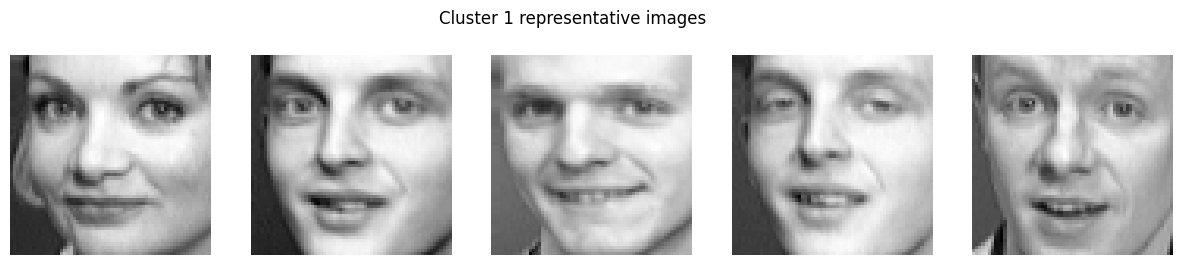

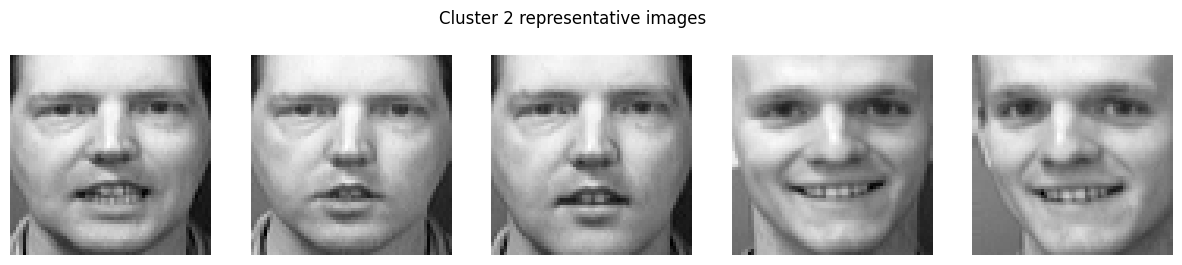

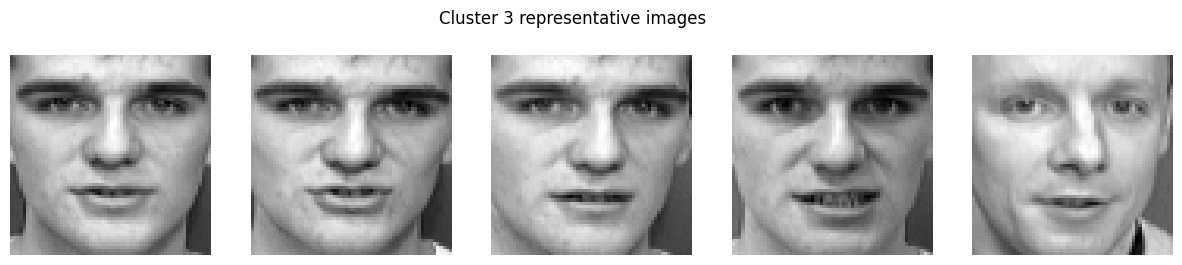

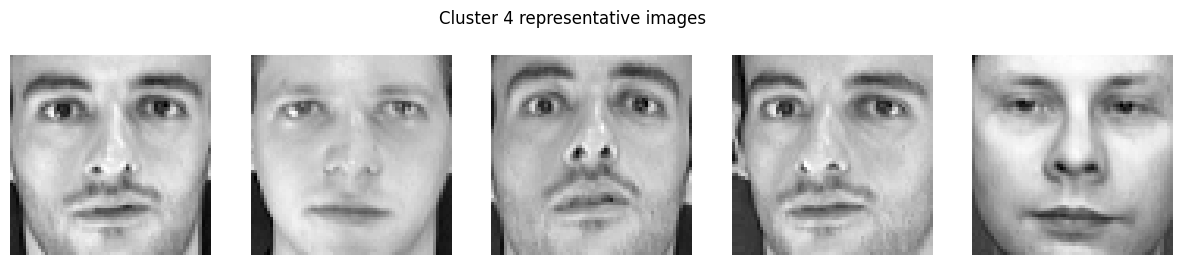

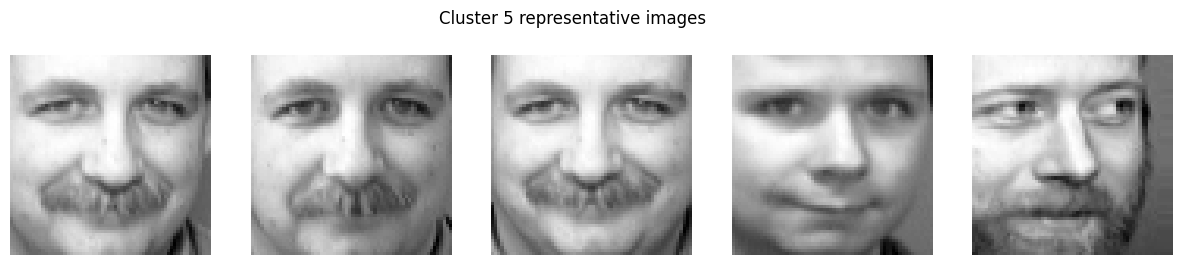

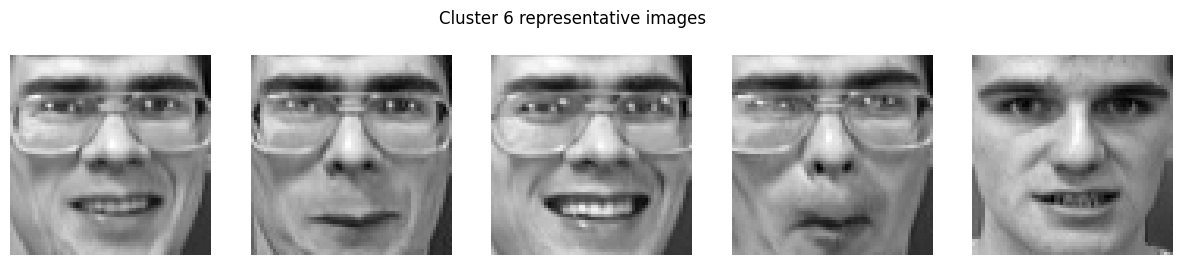

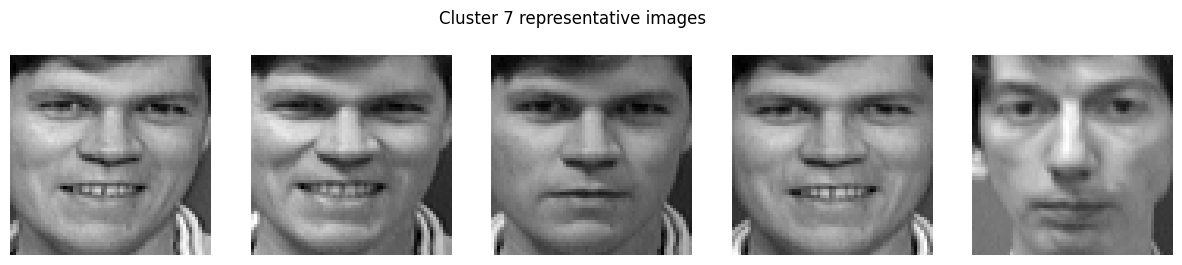

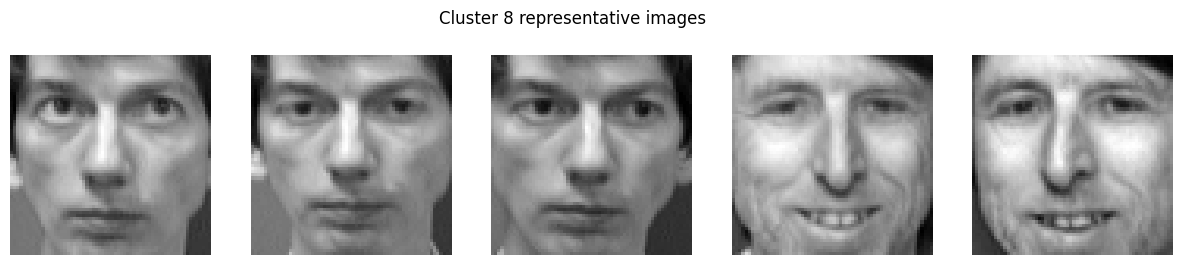

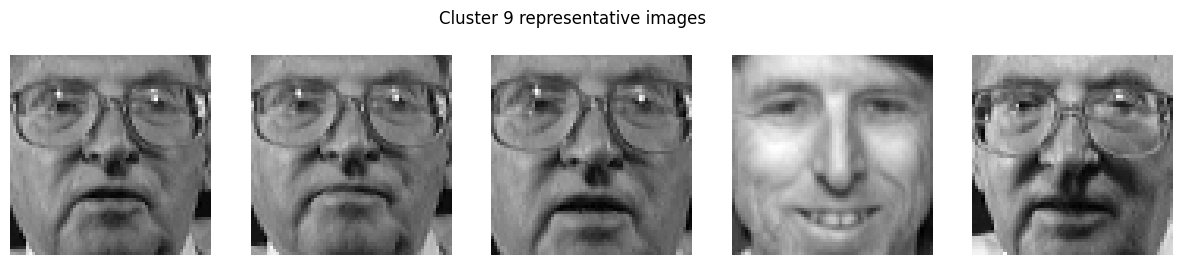

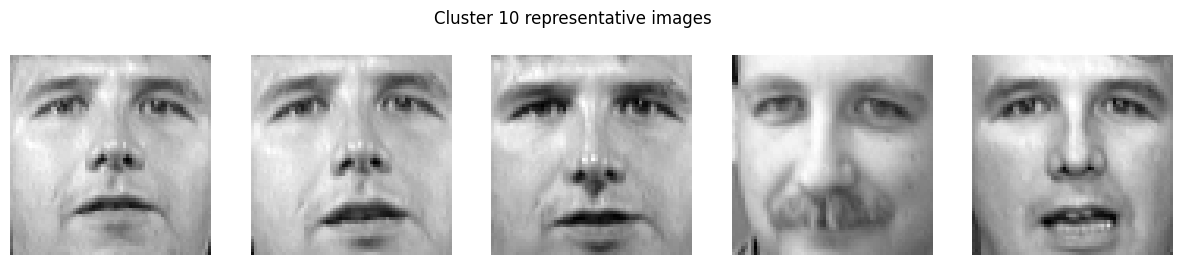

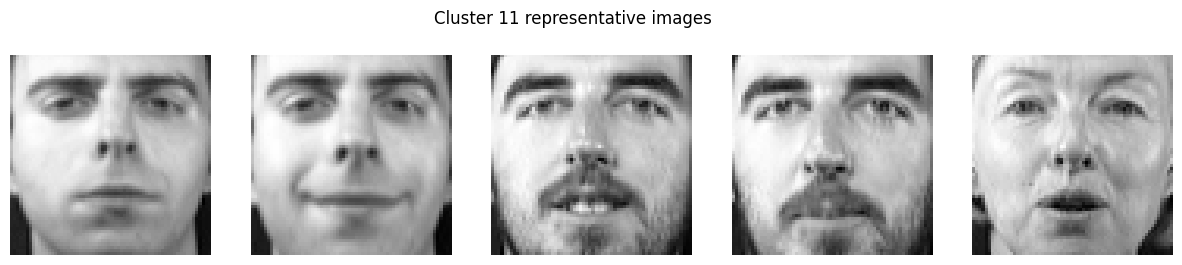

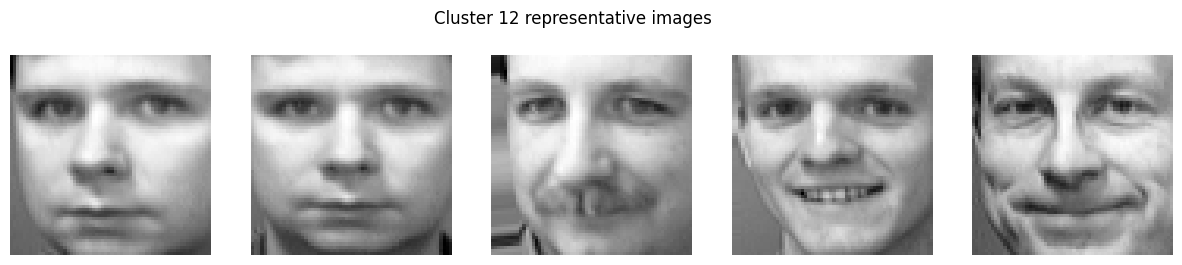

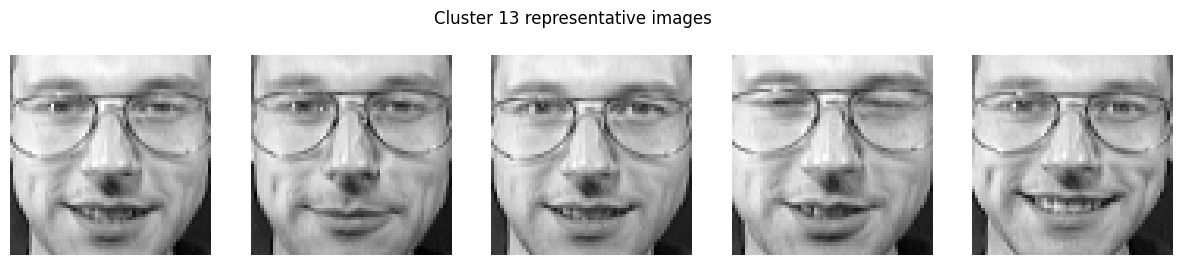

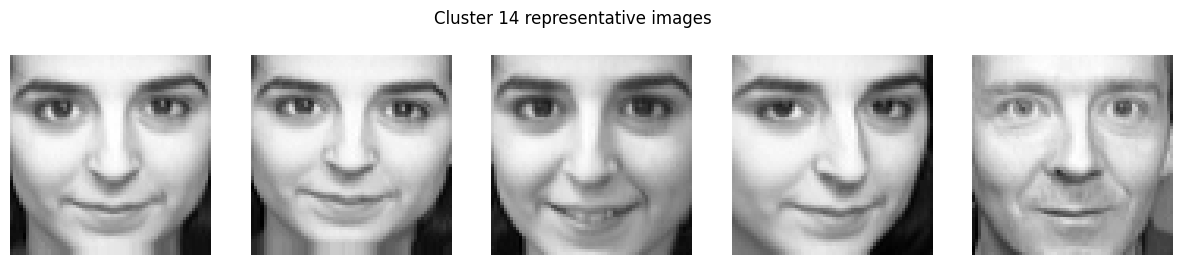

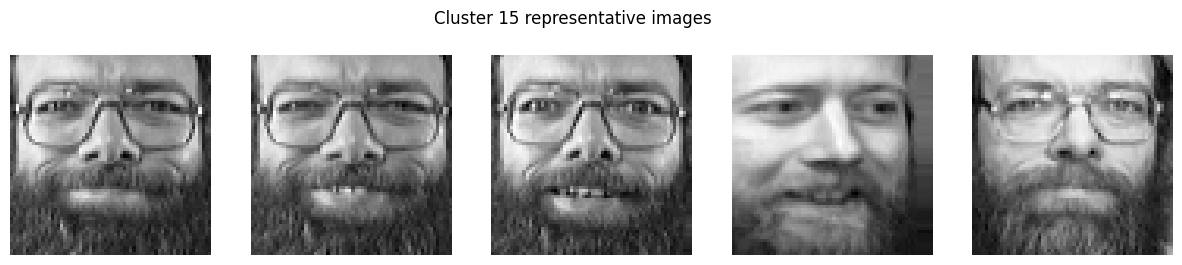

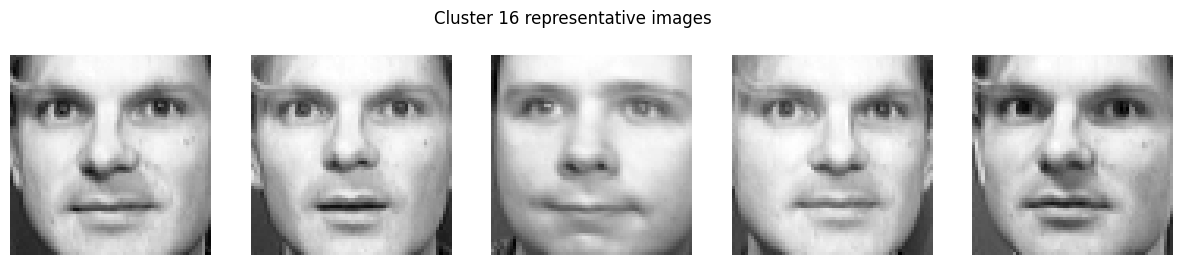

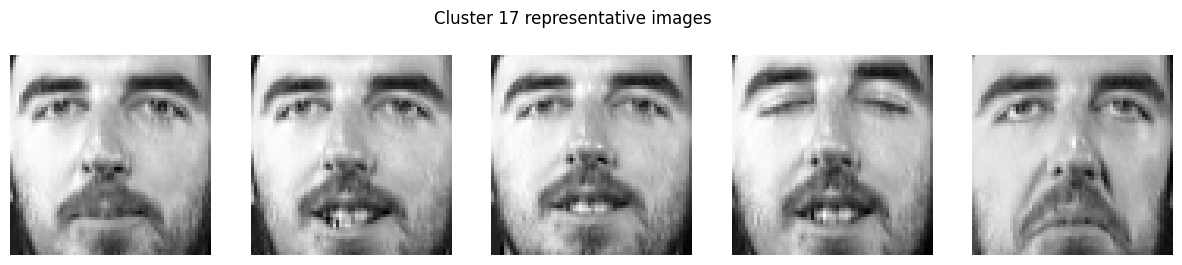

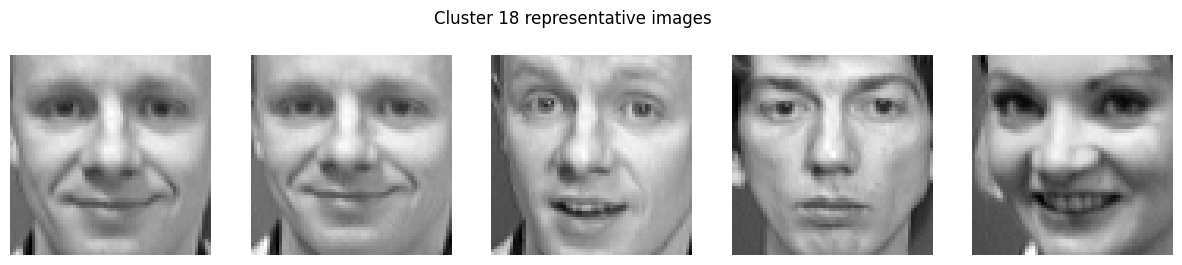

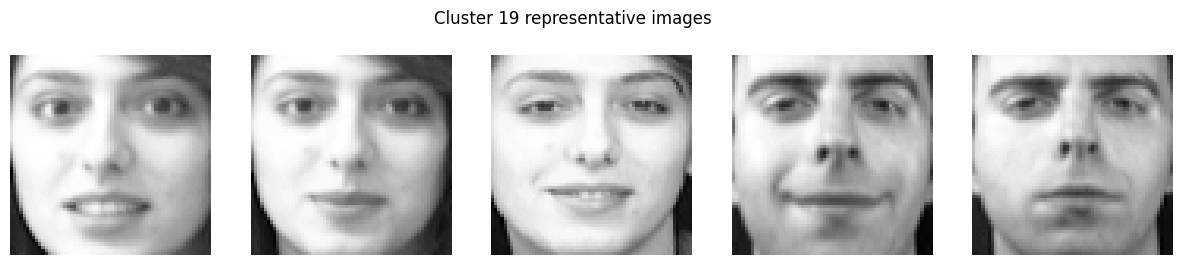

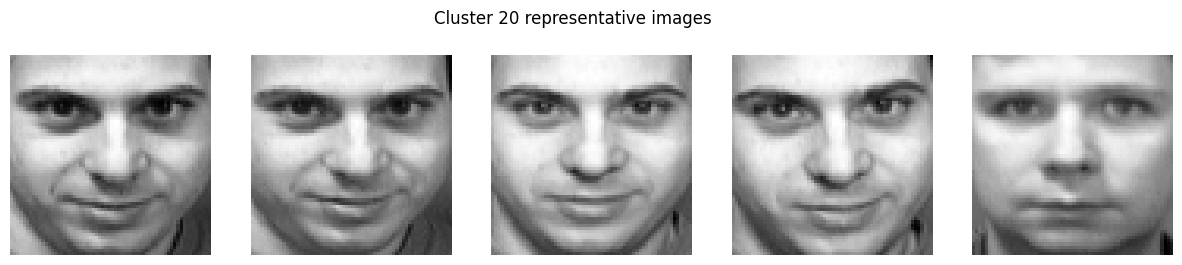

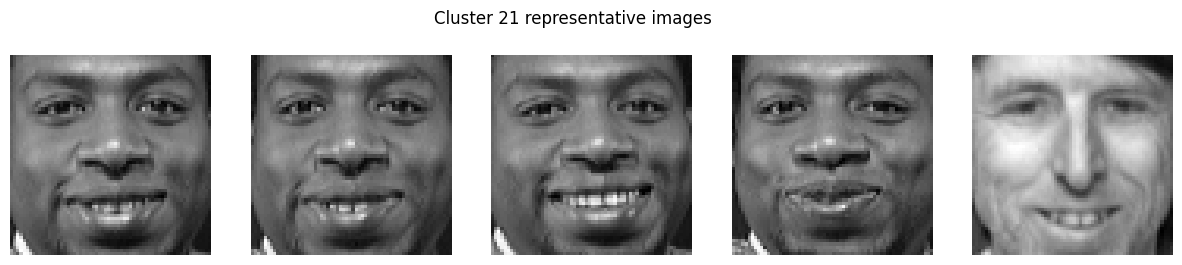

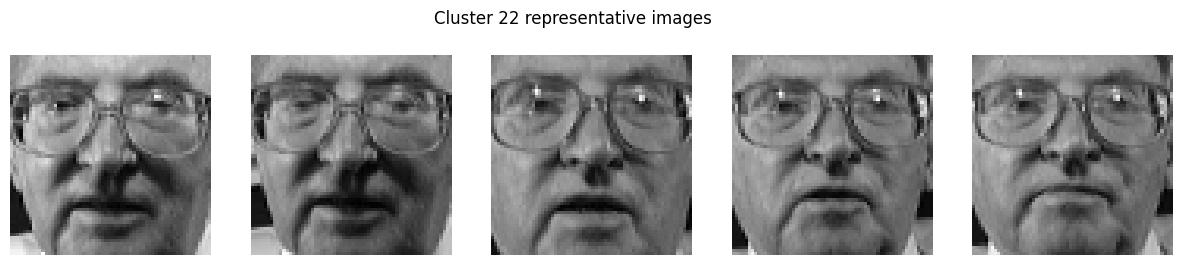

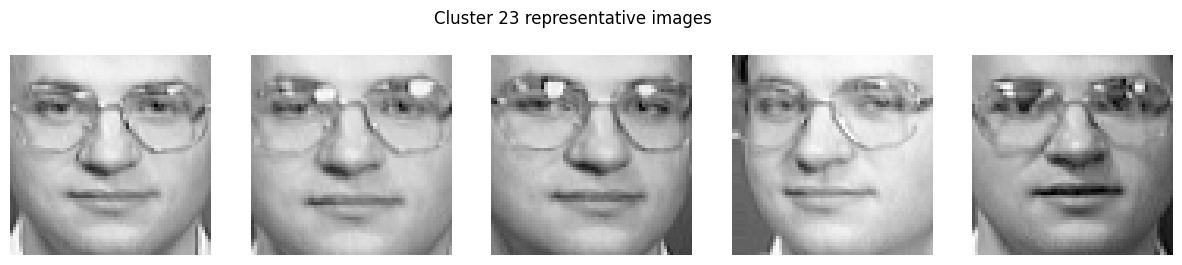

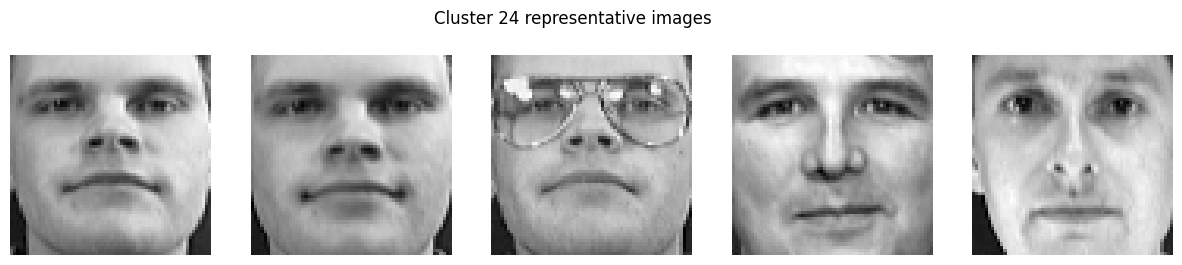

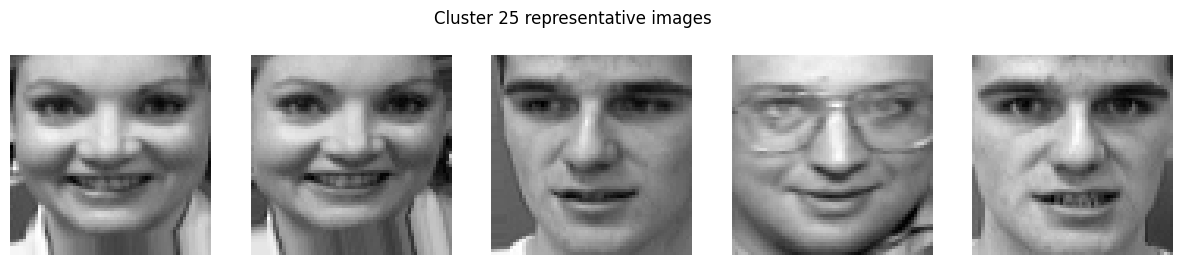

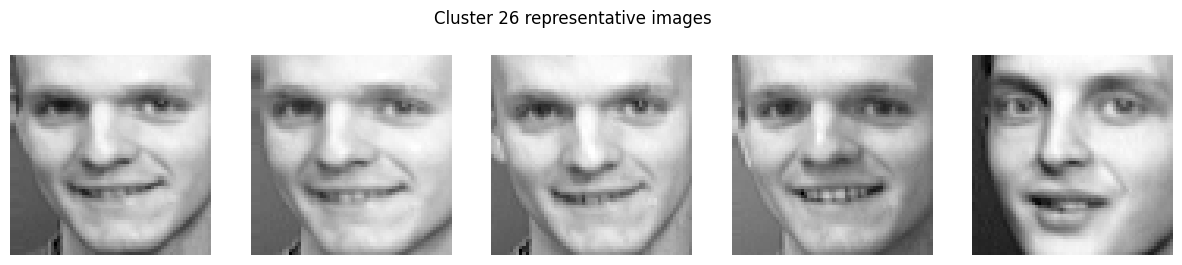

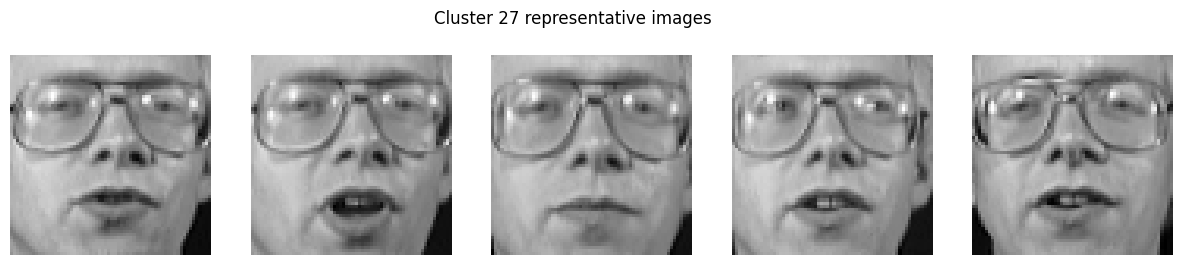

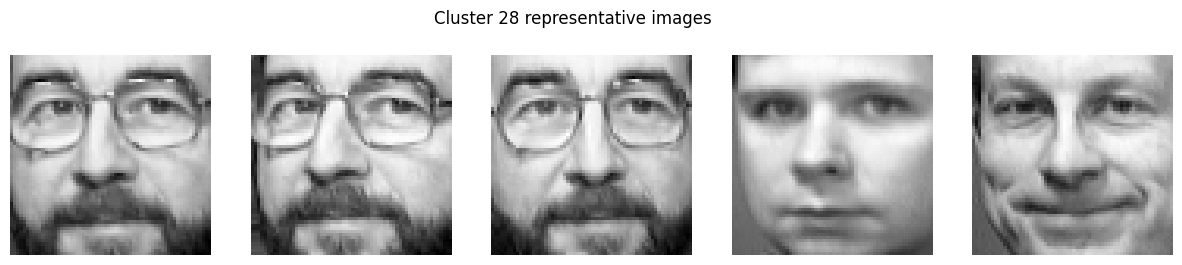

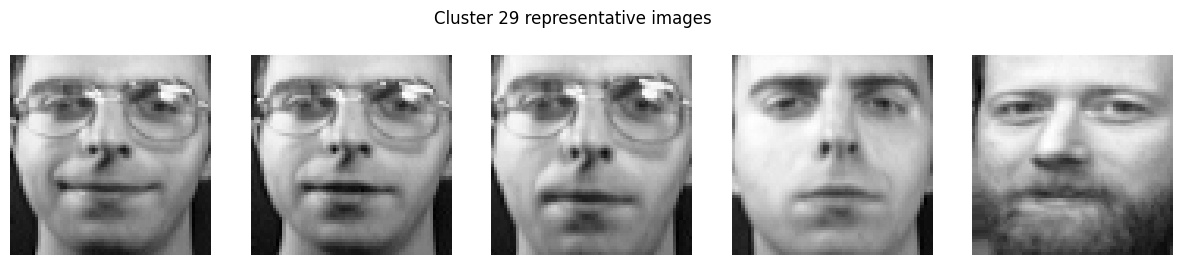

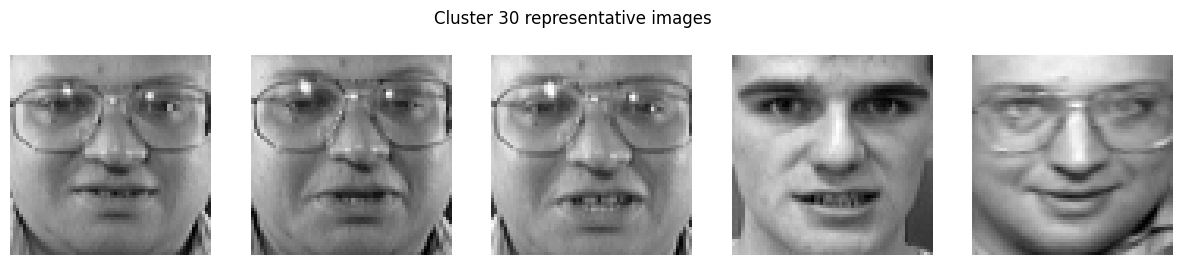

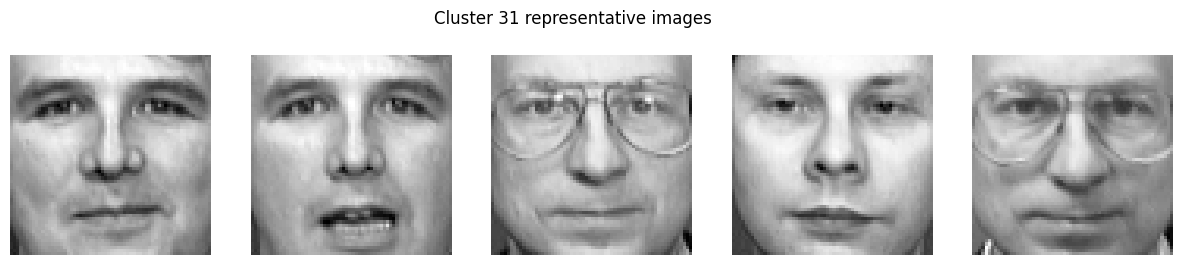

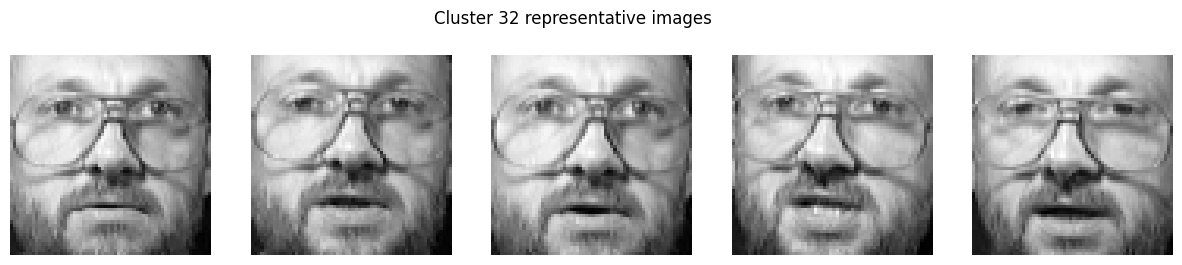

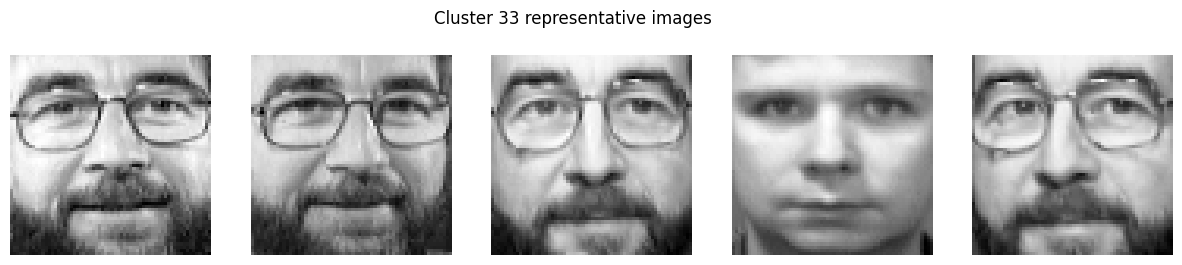

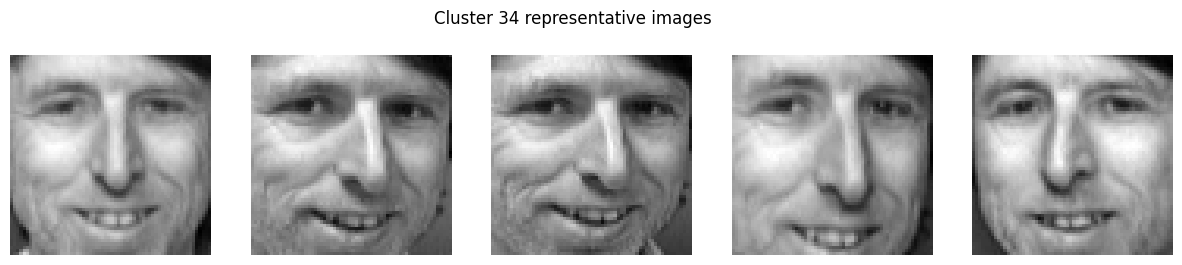

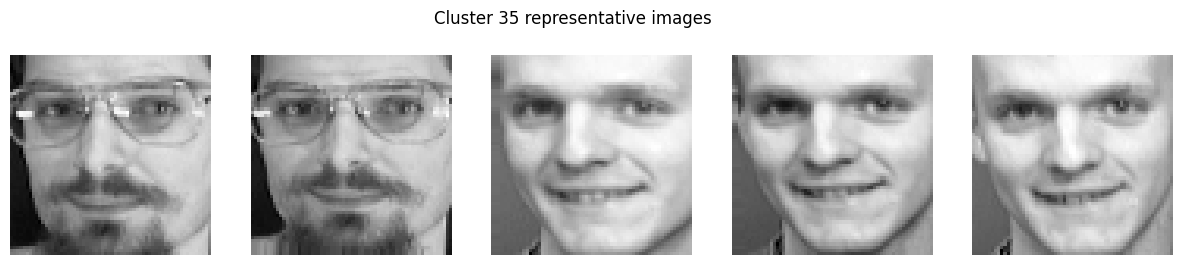

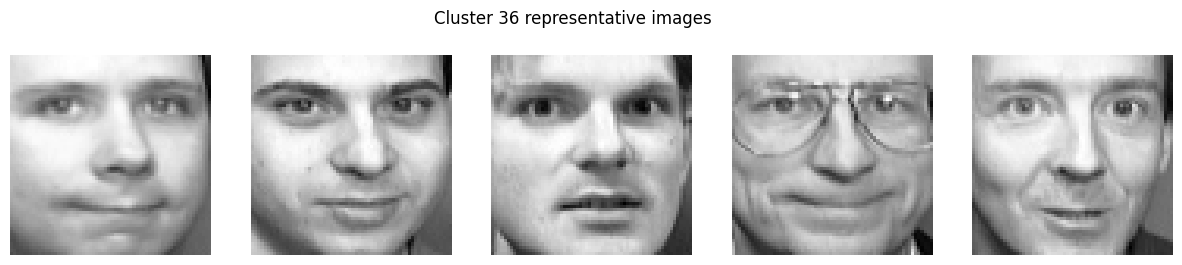

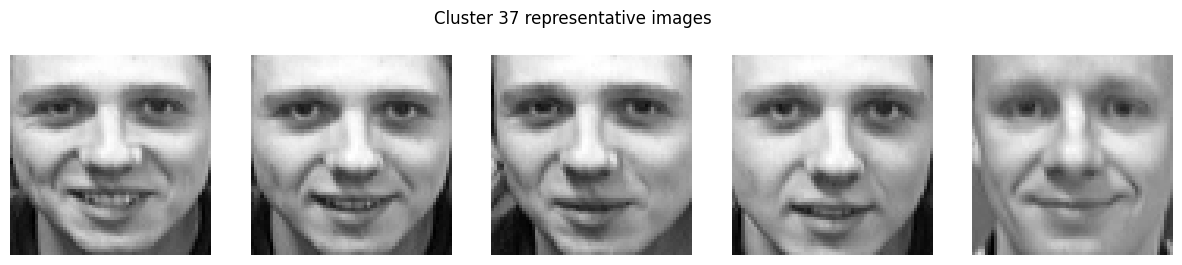

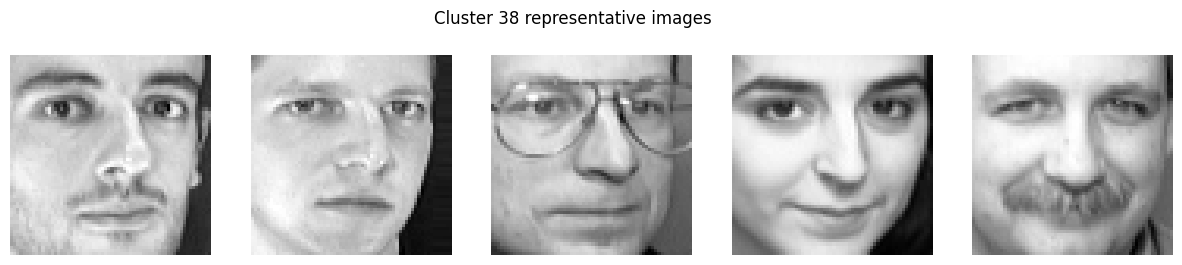

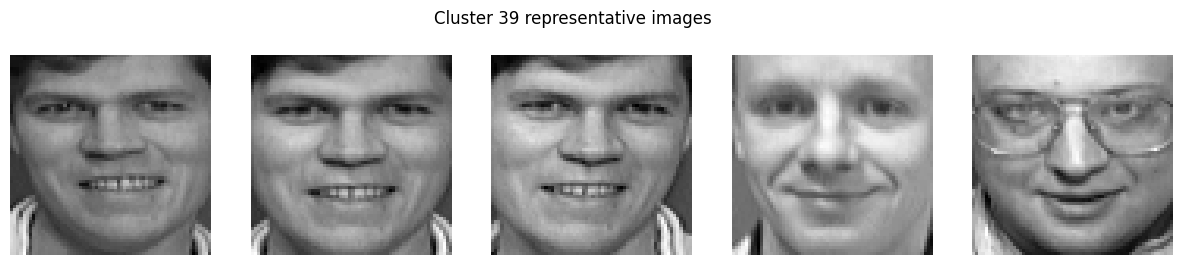

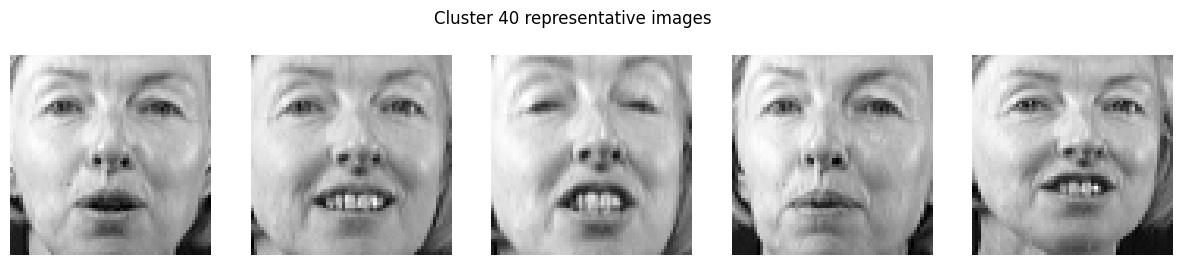

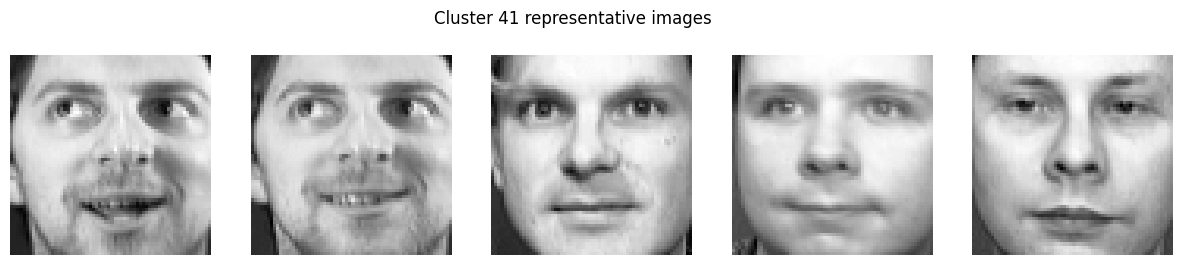

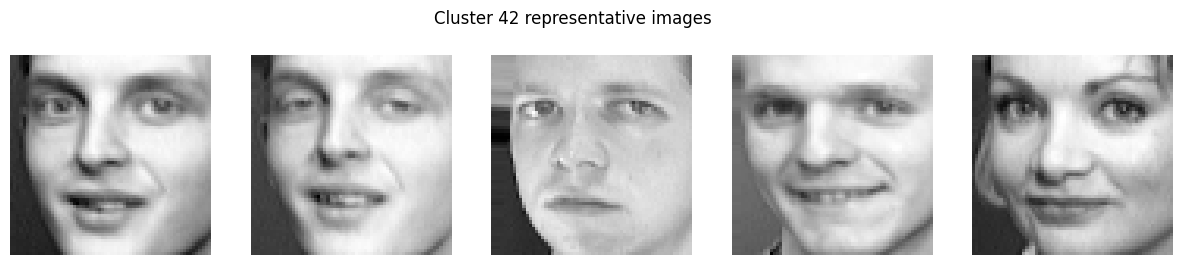

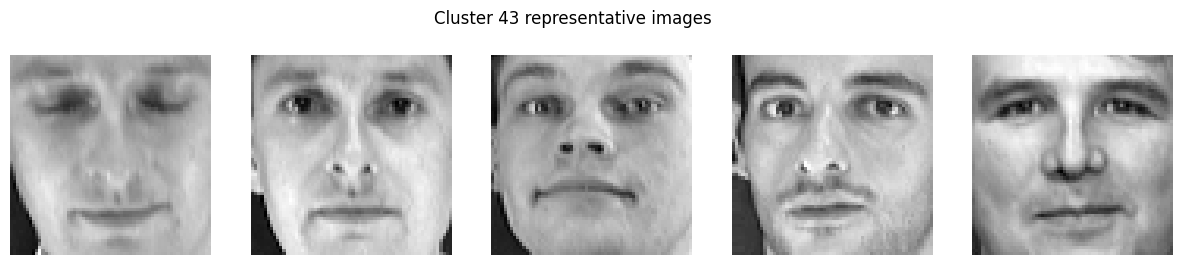

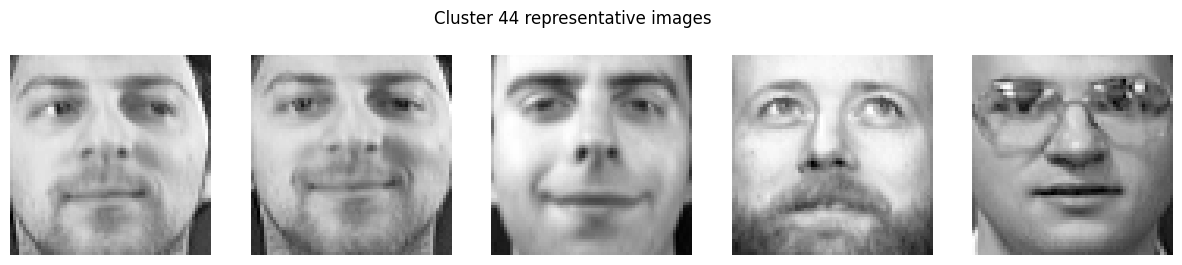

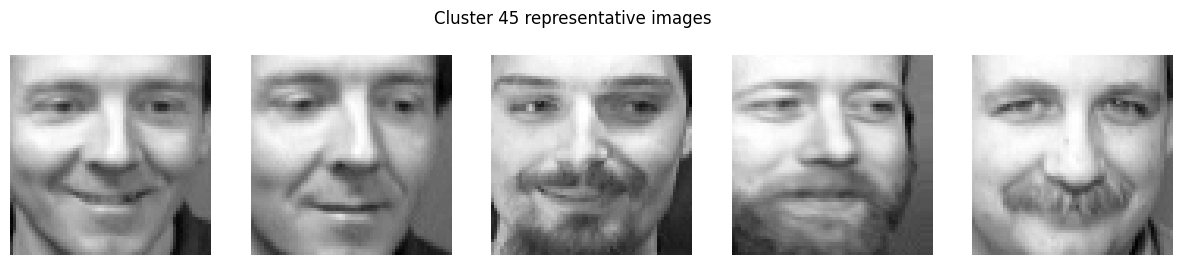

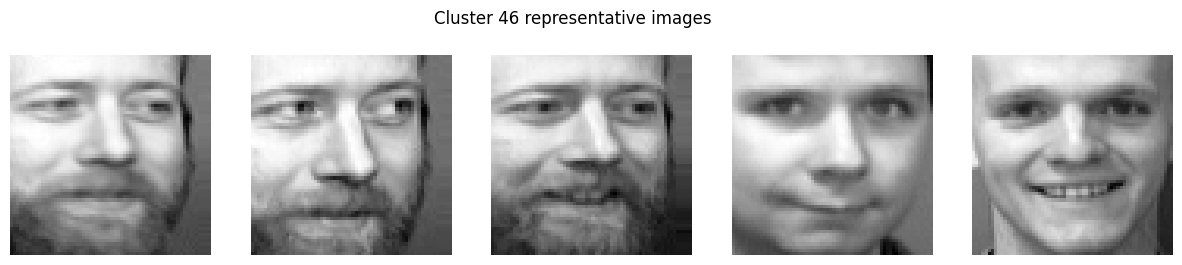

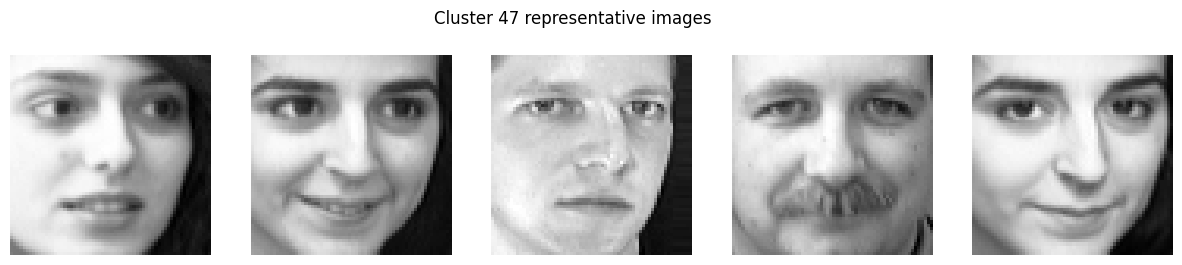

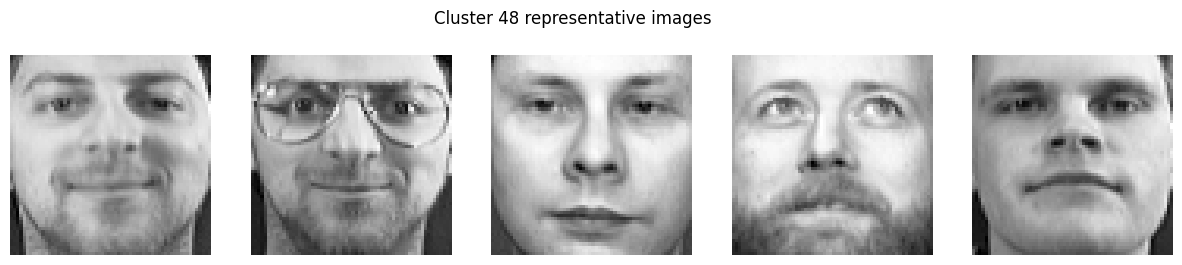

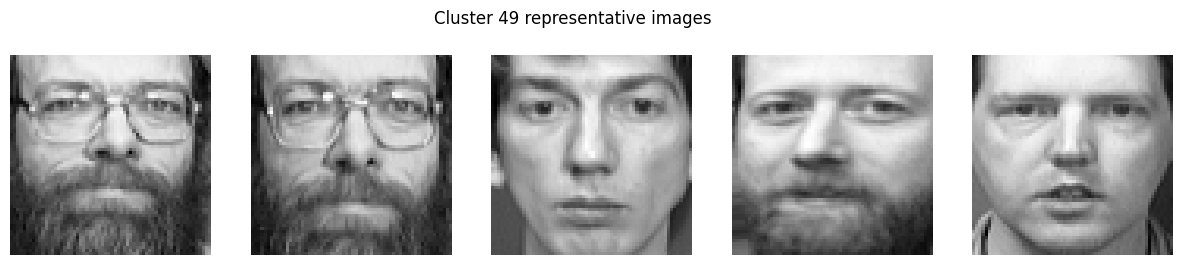

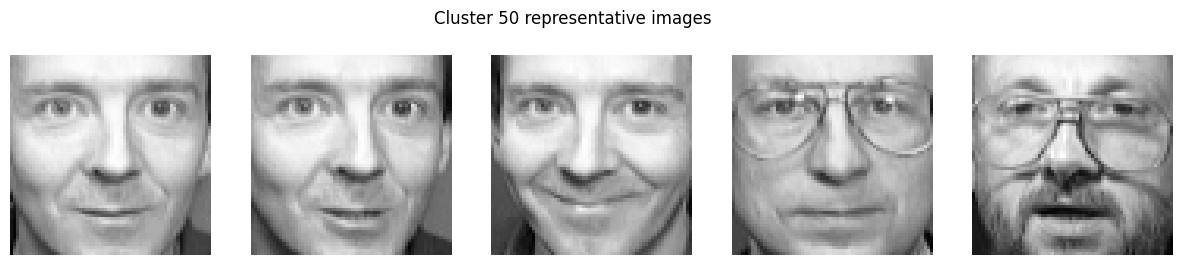

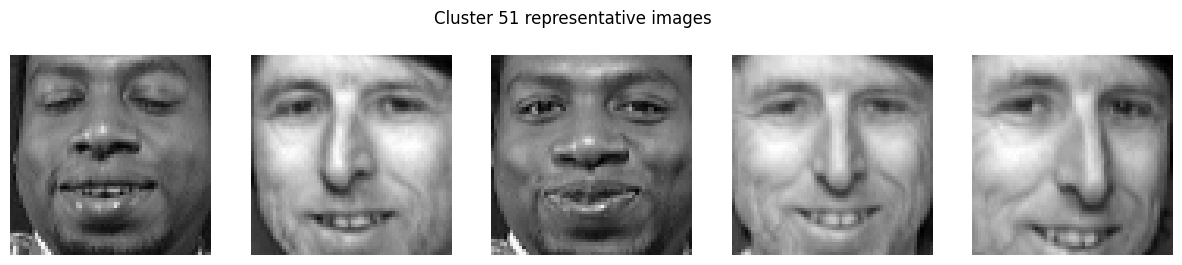

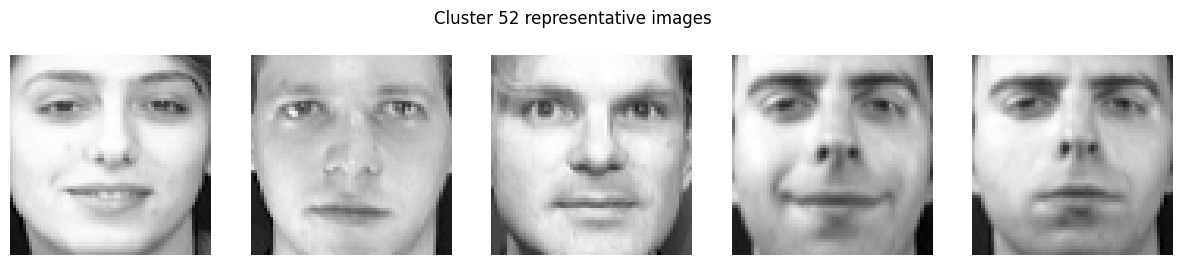

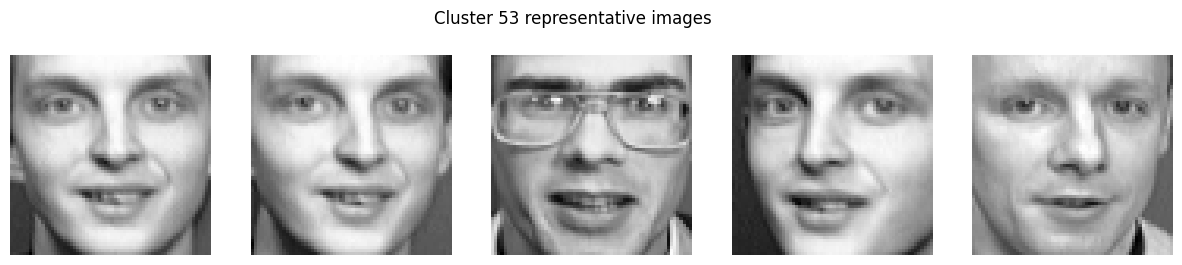

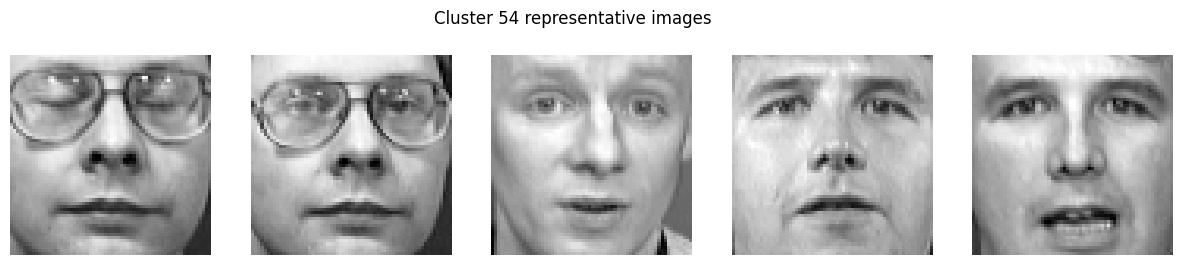

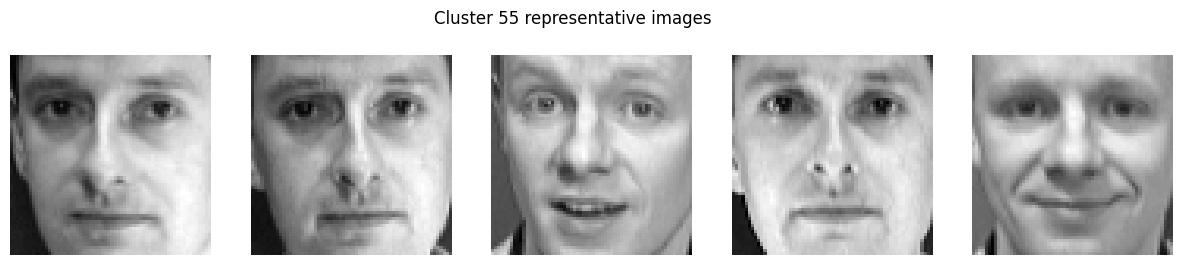

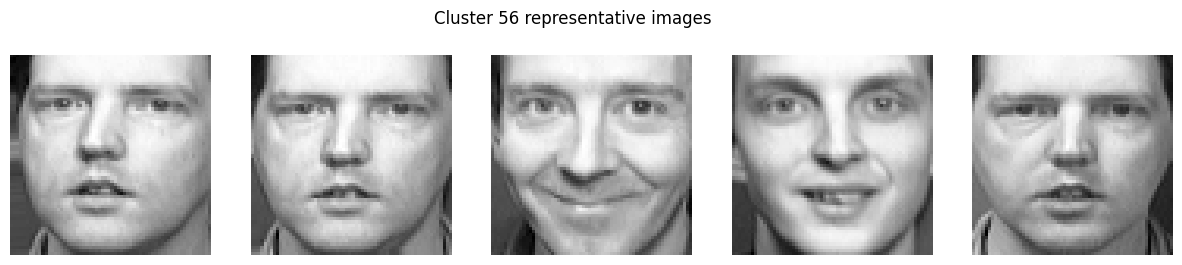

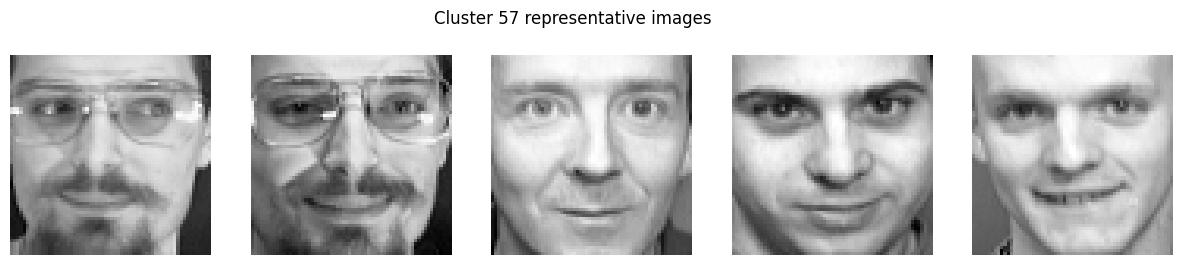

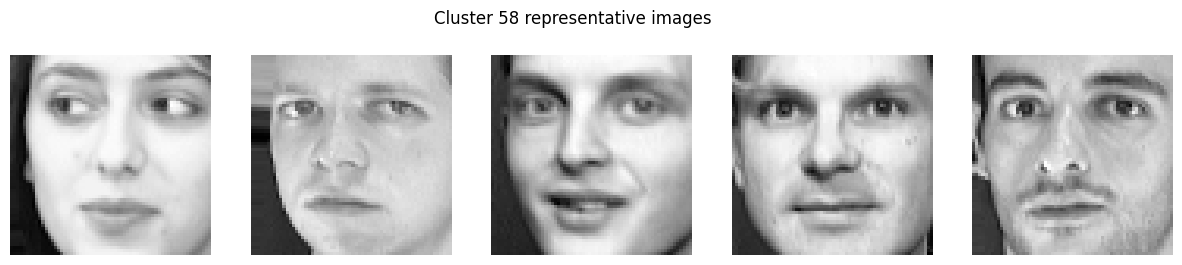

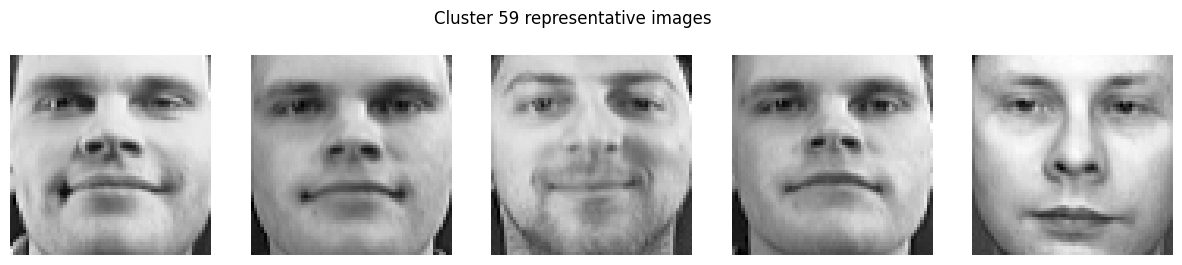

In [11]:
# To represent each cluster with images
for i in range(optimal_k):
    # Find indices of images closest to the cluster center
    distances_to_center = kmeans_bestestimator.transform(X_train)[:, i]
    closest_image_idxs = np.argsort(distances_to_center)[:5]  # 5 closest images
    
    # Plot images
    plt.figure(figsize=(15, 3))
    for idx, img_idx in enumerate(closest_image_idxs):
        plt.subplot(1, 5, idx + 1)
        plt.imshow(X_train[img_idx].reshape(64, 64), cmap='gray')  # Reshape as needed
        plt.axis('off')
    plt.suptitle(f'Cluster {i+1} representative images')
    plt.show()